<a href="https://colab.research.google.com/github/ninfapedano/TRABAJO-FINAL-NINFA-PEDANO-DS/blob/main/TRABAJO_FINAL_DS%2B_Ninfa_Pedano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 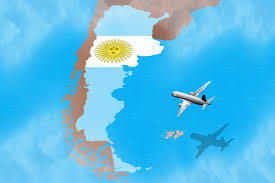

#TRABAJO FINAL
#VIAJES AÉREOS EN ARGENTINA

#ABSTARCT
El conjunto de datos analizado proporciona un registro detallado de vuelos comerciales que operan en ciertas rutas durante un período específico. Incluye información sobre la regularidad de vuelos, la capacidad de asientos, la cantidad de pasajeros transportados y datos geográficos como aeropuertos de origen y destino, localidades y provincias.

El objetivo principal es explorar patrones estacionales, identificar correlaciones entre variables como la demanda de pasajeros y la capacidad de vuelo, y desarrollar modelos predictivos para prever la demanda futura de vuelos en diferentes destinos.



#MOTIVACIÓN
El análisis de datos de vuelos y pasajeros es importante para poder entender patrones de viajes, demanda de transporte aéreo y comportamientos del consumidor en la industria de la aviación. Proporciona información valiosa para aerolíneas, aeropuertos, agencias de viaje y entidades gubernamentales relacionadas con el transporte y el turismo.


#AUDIENCIA
Este análisis está dirigido a profesionales del sector de la aviación, investigadores académicos, autoridades de transporte, analistas de datos y cualquier persona interesada en comprender el movimiento de pasajeros y vuelos a nivel regional o global.


#INTRODUCCIÓN
Los datos recopilados incluyen información detallada sobre vuelos comerciales, incluyendo origen, destino, aerolíneas, número de pasajeros y asientos disponibles. Estos datos son esenciales para estudiar la conectividad aérea, la demanda de transporte y los patrones de viaje en diferentes regiones y continentes.


#DESCRIPCIÓN DE LOS DATOS
Los datos fueron obtenidos de la pàgina del Ministerio de Turismo y Deportes de Argentina. https://datos.yvera.gob.ar/dataset/conectividad-aerea/archivo/aab49234-28c9-48ab-a978-a83485139290
Proporciona un registro detallado de vuelos comerciales que operan en ciertas rutas durante un período específico. Incluye información sobre la regularidad de vuelos, la capacidad de asientos, la cantidad de pasajeros transportados y datos geográficos como aeropuertos de origen y destino, localidades y provincias. Si bien no brinda informaciòn sobre los pasajeros (sòlo cantidad), son datos màs completos y ademas reales.
Aclaraciòn importante: En principio se trabajÓ con un dataset extraÍdo de Kaggle referido a una aerolìnea especÍfica, pero con el correr del cursado me di cuenta que era muy pobre la informaciòn del mismo y no podrÍa desarrollar de la forma que querÍa mi proyecto.

#OBJETIVOS
El objetivo principal del presente trabajo es explorar patrones estacionales, identificar correlaciones entre variables como la demanda de pasajeros y la capacidad de vuelo, y desarrollar modelos predictivos para prever la demanda futura de vuelos en diferentes destinos.



#HIPOTESIS

Hipótesis 1: Existe una correlación positiva entre el número de vuelos y la cantidad de pasajeros transportados en rutas de alta demanda.

Hipótesis 2: Las aerolíneas experimentan una mayor ocupación de asientos en vuelos durante ciertos períodos del año debido a factores estacionales y eventos específicos.

Hipótesis 3: La regularidad de la ruta aérea influye significativamente en la elección de los pasajeros.



#CAMPOS DEL DATASET ORIGINAL
índice tiempo: Índice de tiempo diario. Fecha de vuelo.

clasificacion_vuelo: Tipo de conexión.

clase_vuelo: Regularidad de la ruta aérea.

aerolínea: Aerolínea comercial.

origen_aeropuerto: Aeropuerto de origen.

origen_localidad: Localidad de origen del vuelo.

origen_provincia: Provincia de origen del vuelo.

origen_continente: Continente de origen.

destino_aeropuerto: Aeropuerto de destino.

destino_localidad: Localidad de destino.

destino_provincia: Provincia de destino.

destino_continente: Continente de destino

pasajeros: Cantidad de pasajeros

asientos Número decimal: Cantidad de asientos

vuelos: Cantidad de vuelos


In [72]:
# Importo librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures





In [73]:
# Monto a Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
# Cargo el archivo
vuelos = '/content/gdrive/MyDrive/base_microdatos.csv'
df= pd.read_csv(vuelos)

#ANALISIS EXPLORATORIO DE DATOS


In [6]:
# Vemos las primeras filas del df
df.head()

indice_tiempo clasificacion_vuelo clase_vuelo              aerolinea  \
0    2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
1    2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
2    2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
3    2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
4    2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   

  origen_oaci                          origen_aeropuerto  \
0        SAAV                  Aeropuerto de Sauce Viejo   
1        SASA    Aeropuerto Int. Martín Miguel de Güemes   
2        SAZS       Aeropuerto Int. Tte. Luis Candelaria   
3        SAAR  Aeropuerto Int. de Rosario Islas Malvinas   
4        SAAR  Aeropuerto Int. de Rosario Islas Malvinas   

          origen_localidad origen_provincia origen_pais origen_continente  \
0                 Santa Fe         Santa Fe   Argentina   América del Sur   
1                    Salta            Salta   Argentina   América del Sur   
2  San Carlos de Bariloche        Río Negro   Argentina   América del Sur   
3                  Rosario         Santa Fe   Argentina   América del Sur   
4                  Rosario         Santa Fe   Argentina   América del Sur   

  destino_oaci                            destino_aeropuerto  \
0         SAZS          Aeropuerto Int. Tte. Luis Candelaria   
1         SASJ          Aeropuerto Int. Gdor. Horacio Guzmán   
2         SAAV                     Aeropuerto de Sauce Viejo   
3         SACO  Aeropuerto Int. Ingeniero Ambrosio Taravella   
4         SAEZ            Aeropuerto Int. Ministro Pistarini   

         destino_localidad destino_provincia destino_pais destino_continente  \
0  San Carlos de Bariloche         Río Negro    Argentina    América del Sur   
1    San Salvador de Jujuy             Jujuy    Argentina    América del Sur   
2                 Santa Fe          Santa Fe    Argentina    América del Sur   
3                  Córdoba           Córdoba    Argentina    América del Sur   
4                   Ezeiza      Buenos Aires    Argentina    América del Sur   

   pasajeros  asientos  vuelos  
0         85        85       1  
1         23        83       1  
2         78        83       1  
3         48       128       1  
4         90       128       1

In [7]:
#Vemos las últimas filas con el método .tail()

df.tail(5)

indice_tiempo clasificacion_vuelo clase_vuelo        aerolinea  \
781643    2024-04-30       Internacional     Regular      Sky Airline   
781644    2024-04-30       Internacional     Regular      Sky Airline   
781645    2024-04-30       Internacional     Regular      Sky Airline   
781646    2024-04-30       Internacional     Regular      Sky Airline   
781647    2024-04-30       Internacional     Regular  United Airlines   

       origen_oaci                                  origen_aeropuerto  \
781643        SAEZ                 Aeropuerto Int. Ministro Pistarini   
781644        SAEZ                 Aeropuerto Int. Ministro Pistarini   
781645        SCEL  Comodoro Arturo Merino Benítez International A...   
781646        SPJC                 Jorge Chávez International Airport   
781647        KIAH       George Bush Intercontinental Houston Airport   

       origen_localidad origen_provincia     origen_pais  origen_continente  \
781643           Ezeiza     Buenos Aires       Argentina    América del Sur   
781644           Ezeiza     Buenos Aires       Argentina    América del Sur   
781645         Santiago              NaN           Chile    América del Sur   
781646             Lima              NaN            Perú    América del Sur   
781647          Houston              NaN  Estados Unidos  América del Norte   

       destino_oaci                                 destino_aeropuerto  \
781643         SCEL  Comodoro Arturo Merino Benítez International A...   
781644         SPJC                 Jorge Chávez International Airport   
781645         SAEZ                 Aeropuerto Int. Ministro Pistarini   
781646         SAEZ                 Aeropuerto Int. Ministro Pistarini   
781647         SAEZ                 Aeropuerto Int. Ministro Pistarini   

       destino_localidad destino_provincia destino_pais destino_continente  \
781643          Santiago               NaN        Chile    América del Sur   
781644              Lima               NaN         Perú    América del Sur   
781645            Ezeiza      Buenos Aires    Argentina    América del Sur   
781646            Ezeiza      Buenos Aires    Argentina    América del Sur   
781647            Ezeiza      Buenos Aires    Argentina    América del Sur   

        pasajeros  asientos  vuelos  
781643        198       238       1  
781644        146       186       1  
781645         76       186       1  
781646        170       238       1  
781647        190       276       1

In [8]:
# Verificamos que cumple el 1er requisito, el dataset contiene 781648 filas y 19  columnas

df.shape

(781648, 19)

In [75]:
# Observamos tipo de datos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781648 entries, 0 to 781647
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   indice_tiempo        781648 non-null  object
 1   clasificacion_vuelo  781648 non-null  object
 2   clase_vuelo          781648 non-null  object
 3   aerolinea            781648 non-null  object
 4   origen_oaci          781648 non-null  object
 5   origen_aeropuerto    781648 non-null  object
 6   origen_localidad     781648 non-null  object
 7   origen_provincia     618482 non-null  object
 8   origen_pais          781648 non-null  object
 9   origen_continente    781647 non-null  object
 10  destino_oaci         781648 non-null  object
 11  destino_aeropuerto   781648 non-null  object
 12  destino_localidad    781648 non-null  object
 13  destino_provincia    617411 non-null  object
 14  destino_pais         781648 non-null  object
 15  destino_continente   781648 non-nu

#DUPLICADOS

In [76]:
#Revisamos duplicados
df.duplicated().value_counts()

False    781587
True         61
Name: count, dtype: int64

In [78]:
#Eliminamos duplicados
df = df.drop_duplicates().reset_index(drop=True)

In [79]:
#Revisamos si se eliminaron los duplicados
df.duplicated().value_counts()

False    781587
Name: count, dtype: int64

Realizamos un primer análisis de las variables para ver la cantidad de categorías que poseen

In [80]:

df["clasificacion_vuelo"].unique()


array(['Cabotaje', 'Internacional'], dtype=object)

In [82]:
df["clase_vuelo"].unique()

array(['No Regular', 'Regular'], dtype=object)

In [83]:
df["aerolinea"].unique()

array(['Andes Líneas Aéreas', 'Aerolíneas Argentinas', 'LATAM',
       'Amaszonas', 'Avianca', 'Aeroméxico', 'Air Canada', 'Air Europa',
       'Air France', 'Air New Zealand', 'ITA Airways',
       'American Airlines', 'Boliviana de Aviación', 'British Airways',
       'Copa Airlines', 'Cubana de Aviación', 'Delta Air Lines',
       'Emirates Airline', 'Gol Transportes Aéreos', 'Iberia Airlines',
       'Qatar Airways', 'Sky Airline', 'Turkish Airlines',
       'United Airlines', 'Conviasa', 'KLM', 'Lufthansa', 'Aerovías DAP',
       'LADE - Líneas Aéreas Del Estado', 'TAME', 'ASL Airlines France',
       'Azul Linhas Aereas Brasileiras', 'Paranair', 'BQB Líneas Aéreas',
       'Level', 'Flyest', 'Latin American Wings', 'Estelar Latinoamerica',
       'Flybondi', 'Norwegian Air Shuttle', 'Ethiopian Airlines', 'LASA',
       'Edelweiss Air', 'JetSMART Airlines', 'Aero Regional Paraguaya',
       'Icelandair', 'Qantas Airways Limited', 'Viva Air',
       'South African Airways', 'Swiss 

In [16]:
df["origen_pais"].unique()

array(['Argentina', 'Uruguay', 'Paraguay', 'Estados Unidos', 'España',
       'México', 'Brasil', 'Chile', 'Colombia', 'Bolivia', 'Perú',
       'Francia', 'Nueva Zelandia', 'Italia',
       'Reino Unido de Gran Bretaña e Irlanda del Norte', 'Panamá',
       'Cuba', 'República Dominicana', 'Venezuela', 'Países Bajos',
       'Alemania', 'Ecuador', 'Curazao', 'Canadá', 'Aruba', 'Suiza',
       'Sudáfrica', 'Australia', 'Tailandia', 'Costa Rica', 'Rusia',
       'Etiopía', 'China', 'Emiratos Árabes Unidos', 'Guatemala',
       'Papúa Nueva Guinea', 'Cabo Verde'], dtype=object)

In [17]:
df["origen_oaci"].unique()

array(['SAAV', 'SASA', 'SAZS', 'SAAR', 'SABE', 'SACO', 'SAEZ', 'SAME',
       'SANT', 'SARE', 'SARI', 'SAVC', 'SAVE', 'SAVT', 'SAWC', 'SAWG',
       'SAWH', 'SAZB', 'SAZM', 'SAZN', 'SAZY', 'SAAP', 'SAMR', 'SANE',
       'SANH', 'SANL', 'SANU', 'SAOC', 'SARF', 'SARP', 'SASJ', 'SAVV',
       'SAWE', 'SULS', 'SUMU', 'SGAS', 'KJFK', 'KMIA', 'LEBL', 'MMUN',
       'SBFL', 'SBGL', 'SBGR', 'SBPS', 'SBSV', 'SCEL', 'SKBO', 'SLVR',
       'SPJC', 'LEMD', 'LFPG', 'NZAA', 'LIRF', 'KDFW', 'SBCT', 'SBPA',
       'EGLL', 'MPTO', 'MUCC', 'KATL', 'SBBR', 'SAFS', 'SAVY', 'SANC',
       'SAOU', 'SARC', 'SAZR', 'MDPC', 'MMMX', 'SVMI', 'EHAM', 'EDDF',
       'KIAH', 'KDAL', 'EDDM', 'SCCI', 'SAWP', 'KHOU', 'SUPE', 'SLCB',
       'SBRF', 'SCDA', 'MUHA', 'SBFZ', 'SBSG', 'SBKP', 'SBCB', 'SBMO',
       'SATR', 'EGYP', 'SEQM', 'EGLC', 'KPFN', 'SBEG', 'SBNT', 'SCAR',
       'SVMG', 'SBSP', 'SPQT', 'SAMM', 'SCSE', 'SVMP', 'SEQU', 'SBCF',
       'SADP', 'SBCA', 'SUMO', 'KFLL', 'SLLP', 'SBBV', 'MUCU', 'SCGZ',
      

In [18]:
df["destino_oaci"].unique()

array(['SAZS', 'SASJ', 'SAAV', 'SACO', 'SAEZ', 'SAWC', 'SAME', 'SANT',
       'SARE', 'SARI', 'SASA', 'SAVC', 'SAVE', 'SAVT', 'SAWG', 'SAWH',
       'SAZB', 'SAZM', 'SAZN', 'SAZY', 'SAAR', 'SABE', 'SAAP', 'SAMR',
       'SANE', 'SANH', 'SANL', 'SANU', 'SAOC', 'SARF', 'SARP', 'SAWE',
       'SAZR', 'SAVV', 'SULS', 'SUMU', 'SBGL', 'SBFL', 'SBGR', 'SCEL',
       'SLVR', 'KMIA', 'LEBL', 'MMUN', 'SBSV', 'SKBO', 'SPJC', 'MMMX',
       'LEMD', 'LFPG', 'LIRF', 'KDFW', 'SBCT', 'SBPA', 'SGAS', 'EGLL',
       'MPTO', 'KATL', 'SBPS', 'SBBR', 'SBRF', 'KIAH', 'SAFS', 'SAVY',
       'SANC', 'SAOU', 'SARC', 'SVMG', 'KJFK', 'MDPC', 'NZAA', 'MUCC',
       'EHAM', 'EDDF', 'EDDM', 'SCCI', 'SAWP', 'SLCB', 'SVMI', 'SCDA',
       'SBCB', 'SBFZ', 'SBSG', 'SBMO', 'EGYP', 'SATR', 'SEQM', 'SCAR',
       'KBFM', 'SBEG', 'SPQT', 'SAMM', 'SCSE', 'SBSP', 'SBCF', 'SAOS',
       'MUHA', 'MDCY', 'SBJP', 'SBKP', 'MDAB', 'SPSO', 'KFLL', 'KORD',
       'MDLR', 'MUHG', 'SEGU', 'KEWR', 'EGBB', 'SCNT', 'SCIE', 'SBNF',
      

In [19]:
df["origen_continente"].unique()

array(['América del Sur', 'América del Norte', 'Europa', 'Oceanía',
       'América Central y Caribe', nan, 'África', 'Asia'], dtype=object)

In [20]:
df["indice_tiempo"].unique()

array(['2017-01-01', '2017-01-02', '2017-01-03', ..., '2024-04-28',
       '2024-04-29', '2024-04-30'], dtype=object)

In [84]:
# Convertimos 'clase_vuelo' a variable numérica
df['clase_vuelo_num'] = df['clase_vuelo'].map({'No Regular': 0, 'Regular': 1})


In [85]:
df.describe().transpose()

count        mean         std  min    25%    50%    75%  \
pasajeros        781587.0  206.904011  169.651788  1.0   93.0  158.0  265.0   
asientos         781587.0  254.377209  192.516422  1.0  128.0  186.0  324.0   
vuelos           781587.0    1.583487    1.112568  1.0    1.0    1.0    2.0   
clase_vuelo_num  781587.0    0.979968    0.140111  0.0    1.0    1.0    1.0   

                    max  
pasajeros        2353.0  
asientos         2465.0  
vuelos             15.0  
clase_vuelo_num     1.0

In [86]:
#Eliminamos columnas origen_oaci y destino oaci dado que no aportan mayor información al análisis
df.drop(['origen_oaci', 'destino_oaci'], axis = 'columns', inplace=True)


##TRATAMIENTO DE NULOS

In [87]:
# Analizamos valores nulos
df.isnull().sum()

indice_tiempo               0
clasificacion_vuelo         0
clase_vuelo                 0
aerolinea                   0
origen_aeropuerto           0
origen_localidad            0
origen_provincia       163146
origen_pais                 0
origen_continente           1
destino_aeropuerto          0
destino_localidad           0
destino_provincia      164222
destino_pais                0
destino_continente          0
pasajeros                   0
asientos                    0
vuelos                      0
clase_vuelo_num             0
dtype: int64

In [25]:
import missingno as msno

<Axes: >

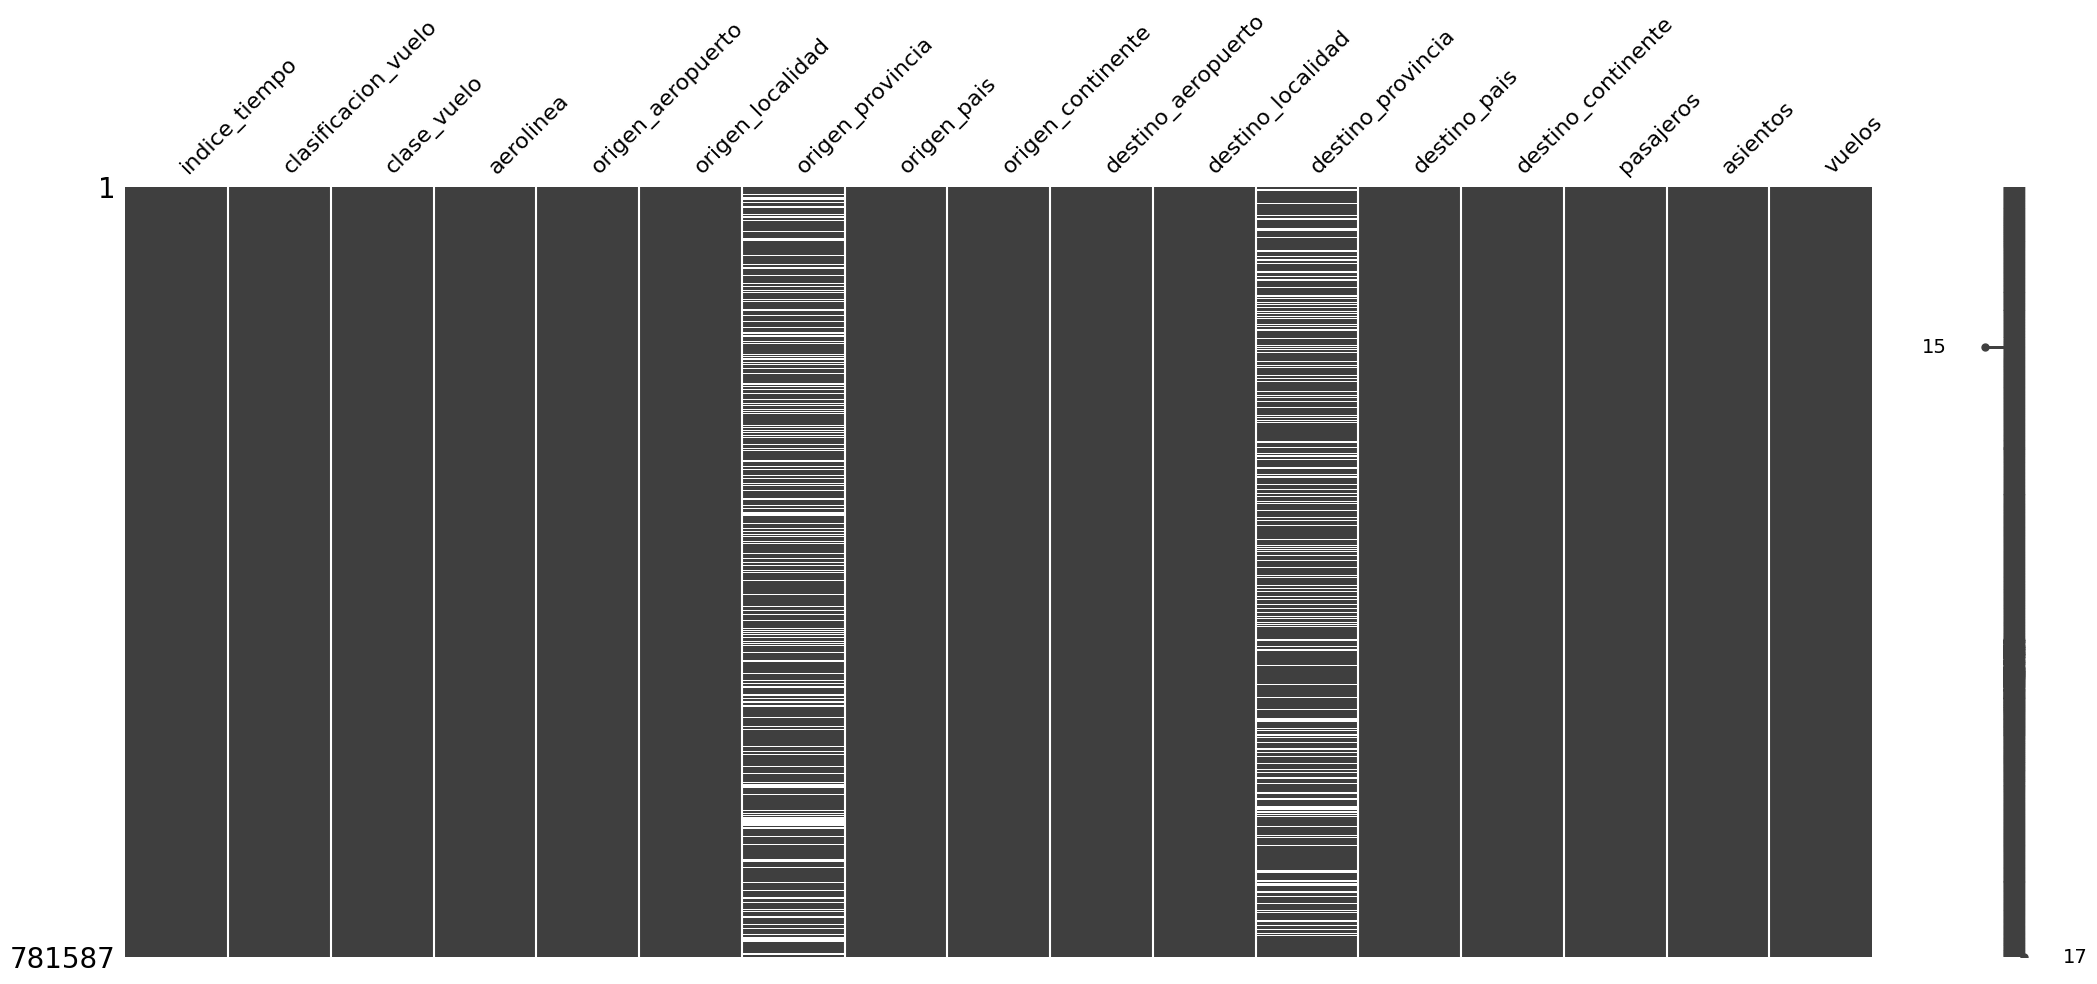

In [26]:
# Visualización tipo matriz
msno.matrix(df)

<Axes: >

<Figure size 200x100 with 0 Axes>

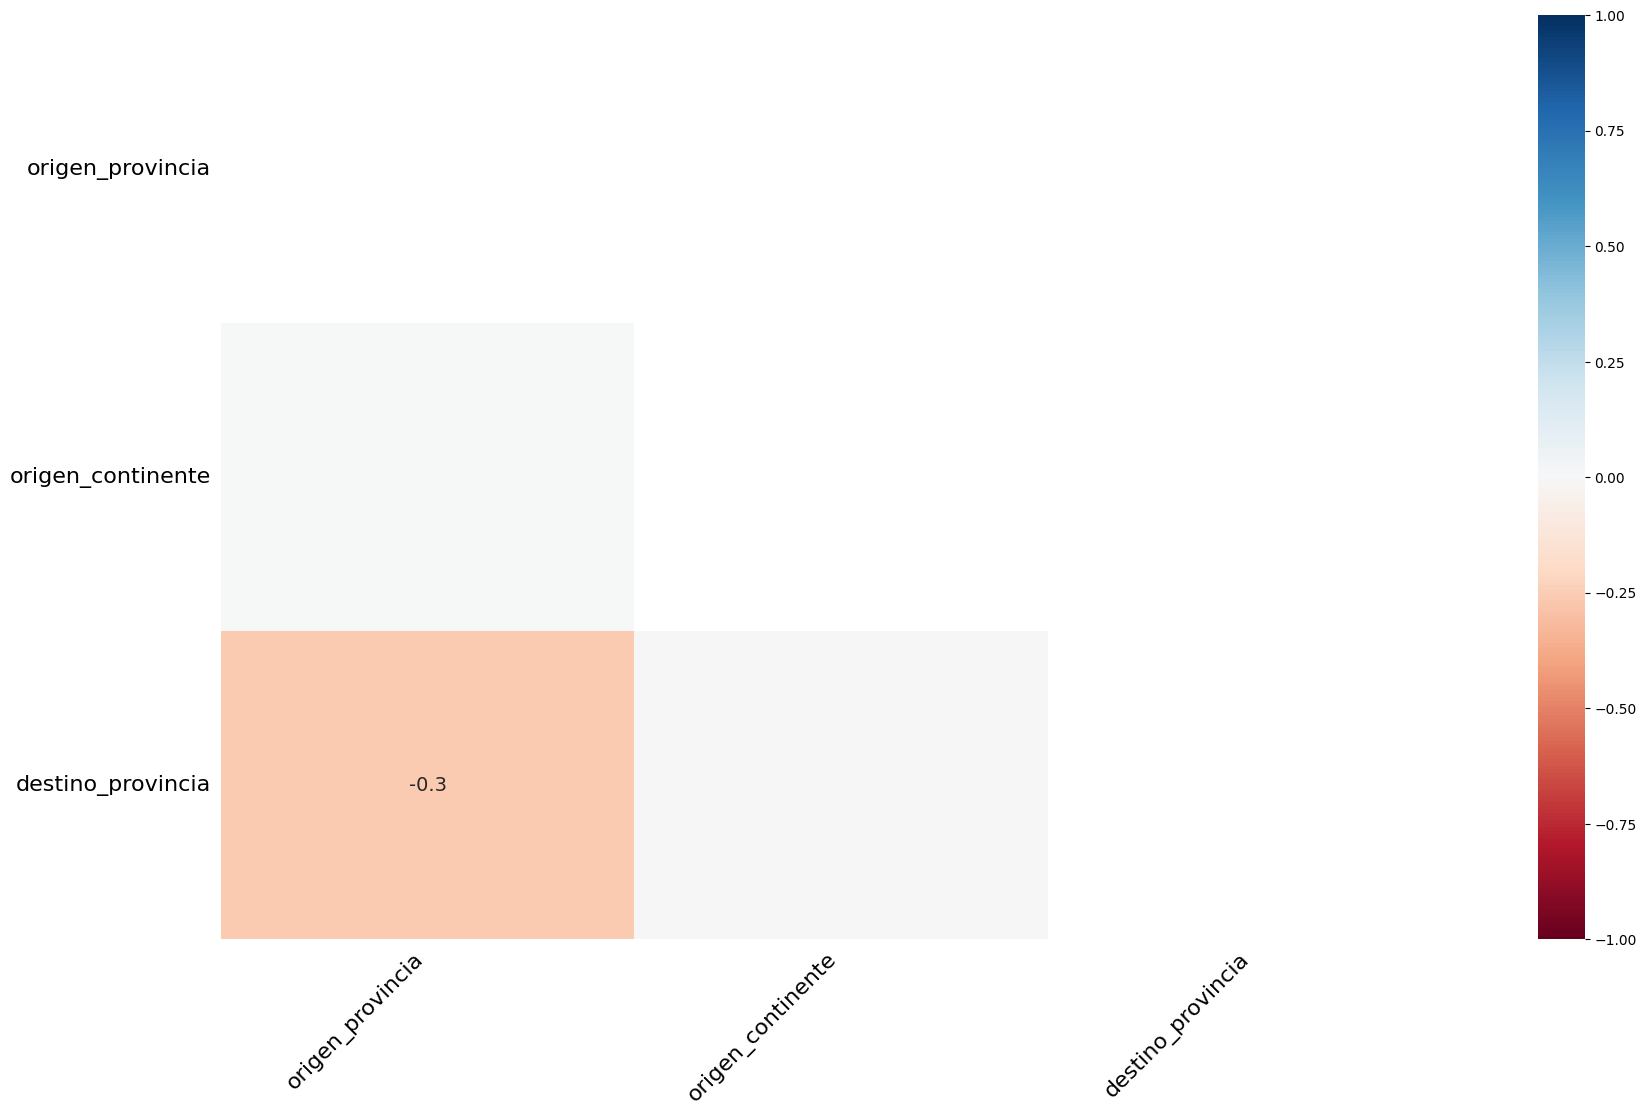

In [27]:
# Visualización con heatmap
plt.figure(figsize=(2, 1))
msno.heatmap(df)

Este heatmap nos dice que no están relacionados los nulos entre destino provincia y origen provincia o no siempre son faltantes en la misma fila.

<Axes: >

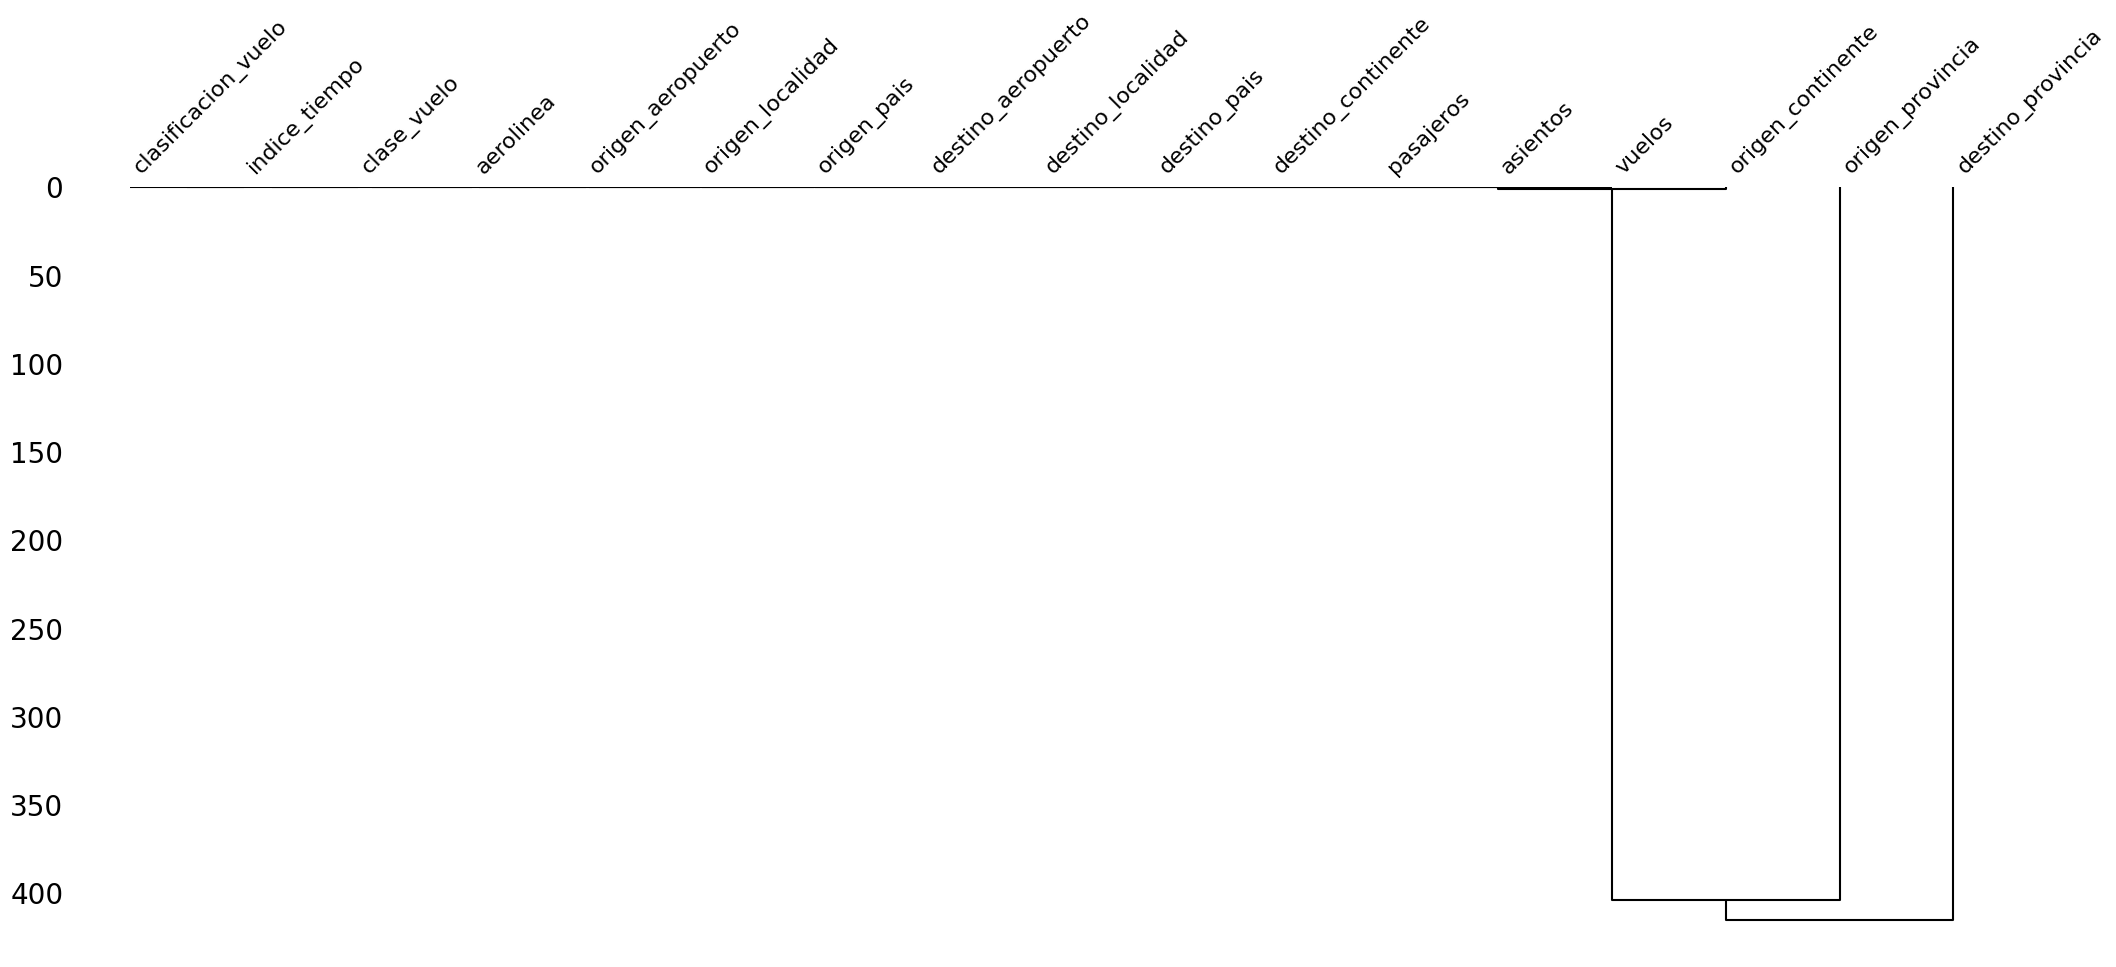

In [28]:
# Visualización con dendograma
msno.dendrogram(df)

<Axes: >

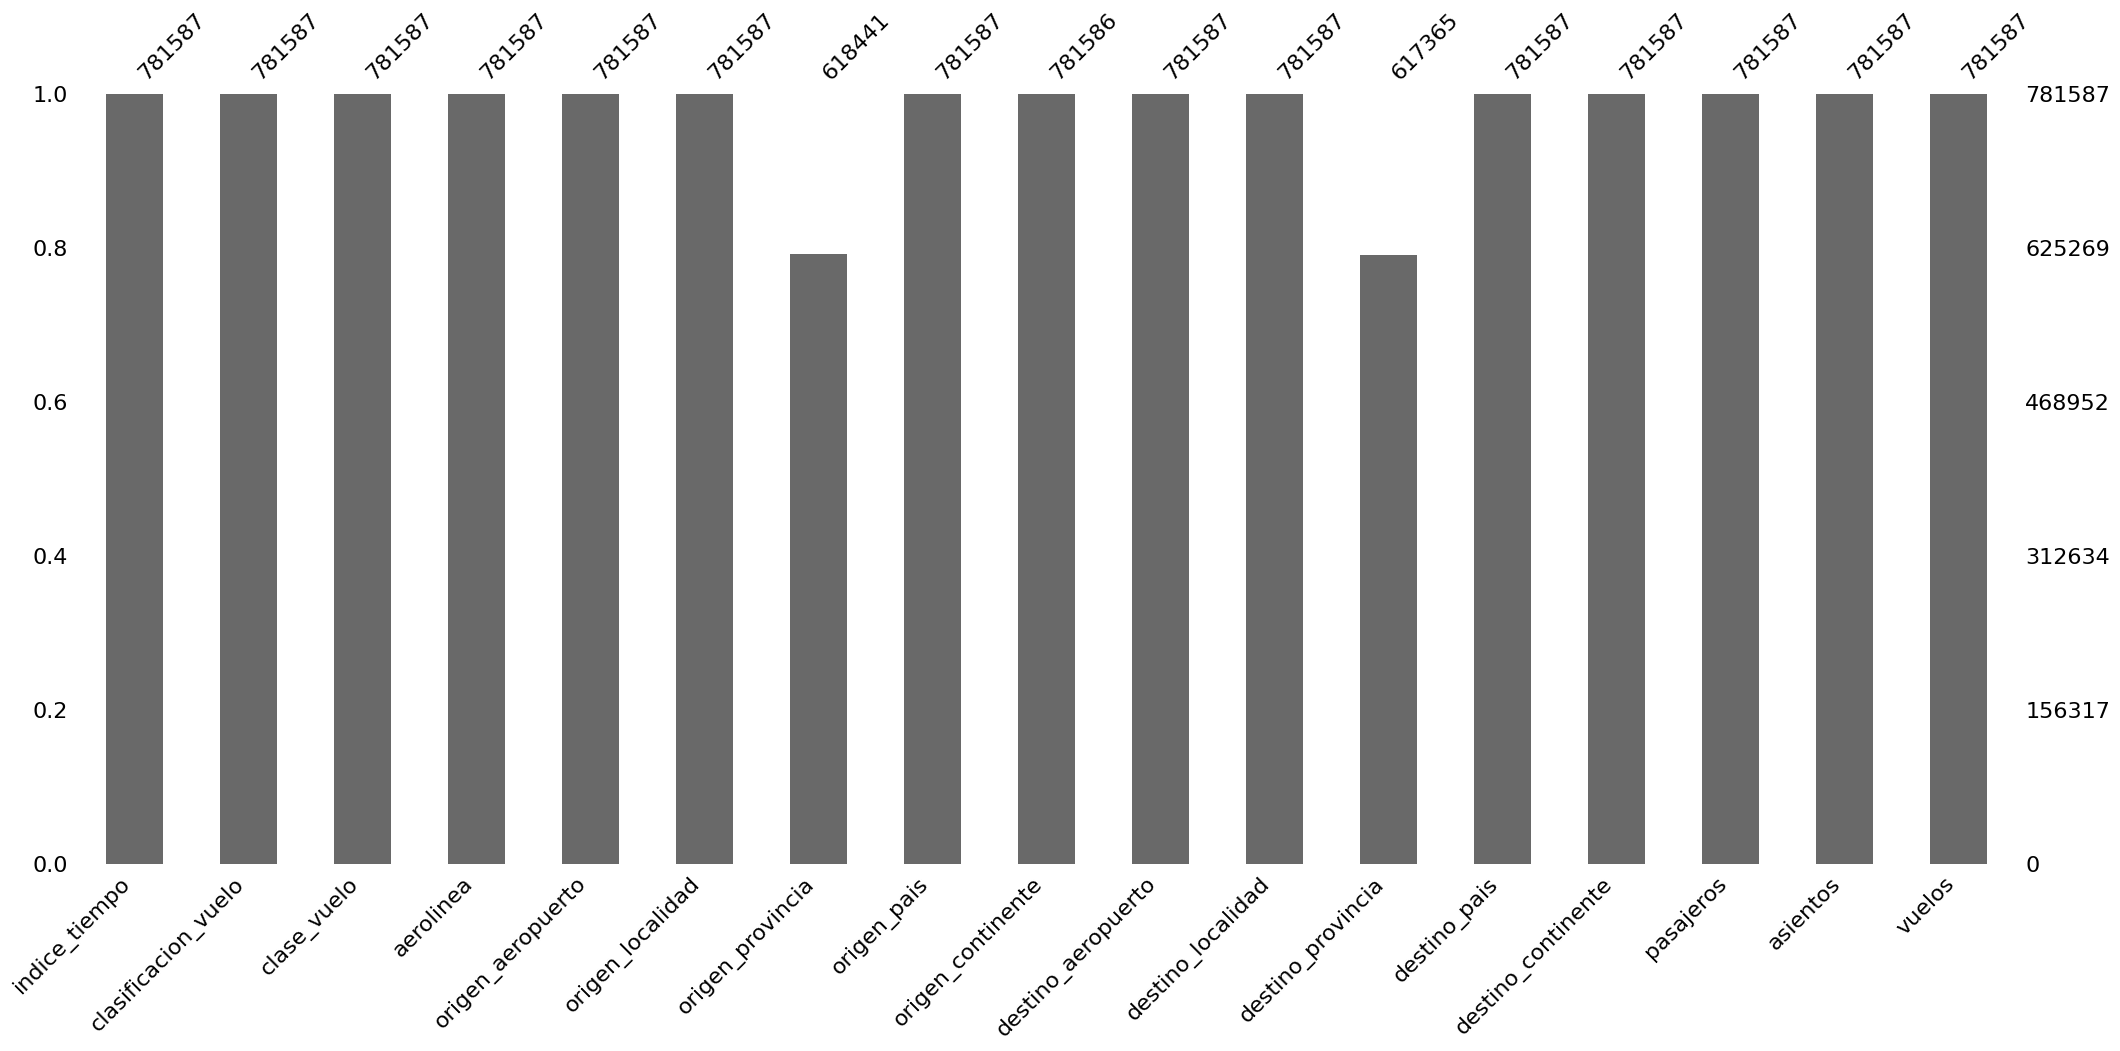

In [29]:
msno.bar(df)

In [88]:
df.origen_provincia.value_counts()
#notamos que en provincia sólo trae provincias argentinas

origen_provincia
Ciudad Autónoma de Buenos Aires                          161540
Buenos Aires                                             159640
Córdoba                                                   49328
Mendoza                                                   31975
Chubut                                                    24067
Río Negro                                                 23386
Misiones                                                  22221
Salta                                                     20277
Santa Fe                                                  19401
Neuquén                                                   18588
Tierra del Fuego, Antártida e Islas del Atlántico Sur     18087
Santa Cruz                                                16431
Tucumán                                                   12358
Jujuy                                                      9338
Chaco                                                      5020
Santiago del Estero    

In [89]:
#reemplazamos los valores nulos de origen_provincia por los valores correspondientes a origen localidad, que corresponden a otros paises
df['origen_provincia'].fillna(df['origen_localidad'], inplace=True)

In [90]:
#reemplazamos de la misma manera anterior los valore nulos de destino provincia por destino localidad
df['destino_provincia'].fillna(df['destino_localidad'], inplace=True)

In [91]:
# para saber cuál es el país correpondiente al único valor nulo en continente, lo reeemplazamos por el país de la misma fila para poder identificarlo

df['origen_continente'].fillna(df['origen_pais'], inplace=True)
df["origen_continente"].unique()

array(['América del Sur', 'América del Norte', 'Europa', 'Oceanía',
       'América Central y Caribe', 'Curazao', 'África', 'Asia'],
      dtype=object)

In [92]:
#reemplazamos Curazao por el continente correcto
df['origen_continente']= df["origen_continente"].replace('Curazao','América Central y Caribe')
df["origen_continente"].unique()

array(['América del Sur', 'América del Norte', 'Europa', 'Oceanía',
       'América Central y Caribe', 'África', 'Asia'], dtype=object)

In [93]:
#Chequeamos que no existan nulos
df.isnull().sum()

indice_tiempo          0
clasificacion_vuelo    0
clase_vuelo            0
aerolinea              0
origen_aeropuerto      0
origen_localidad       0
origen_provincia       0
origen_pais            0
origen_continente      0
destino_aeropuerto     0
destino_localidad      0
destino_provincia      0
destino_pais           0
destino_continente     0
pasajeros              0
asientos               0
vuelos                 0
clase_vuelo_num        0
dtype: int64

#Variables temporales

In [94]:
#Convertimos la columna "indice_tiempo" a date time y cambio el nombre a "fecha"
df['indice_tiempo']= pd.to_datetime(df['indice_tiempo'])
df.rename(columns={'indice_tiempo':'fecha'}, inplace=True)


In [95]:
#extraemos el año de la columna 'fecha'
df['Year'] = df['fecha'].dt.year
#extraemos el dia de la columna 'fecha'
df['Day'] = df['fecha'].dt.day
#extraemos el dia de la semana de la columna 'fecha'
df['DayOfWeek'] = df['fecha'].dt.dayofweek
#extraemos el año y mes de la columna 'fecha'
df['YearMonth'] = df['fecha'].dt.to_period('M')
df['Month'] = df['fecha'].dt.month


In [96]:
#Chequeamos cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781587 entries, 0 to 781586
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fecha                781587 non-null  datetime64[ns]
 1   clasificacion_vuelo  781587 non-null  object        
 2   clase_vuelo          781587 non-null  object        
 3   aerolinea            781587 non-null  object        
 4   origen_aeropuerto    781587 non-null  object        
 5   origen_localidad     781587 non-null  object        
 6   origen_provincia     781587 non-null  object        
 7   origen_pais          781587 non-null  object        
 8   origen_continente    781587 non-null  object        
 9   destino_aeropuerto   781587 non-null  object        
 10  destino_localidad    781587 non-null  object        
 11  destino_provincia    781587 non-null  object        
 12  destino_pais         781587 non-null  object        
 13  destino_contin

## **CALCULO DE MÉTRICAS**
**COP**=CAPACIDAD OPERATIVA DEL AVIÓN. CANTIDAD DE PASAJEROS/ASIENTOS

**CINS**=CAPACIDAD INSTALADA. Es la cantidad de asientos posibles de ocupar.

**PROMAS** = PROMEDIO DE ASIENTOS POR AVIÓN. ASIENTOS/VUELOS

In [97]:
#verificamos que la cantidad de asientos y pasajeros no es la misma, ya que no siempre los aviones van completos
df.asientos.sum()



198817920

In [40]:
df.pasajeros.sum()

161713485

In [104]:
#porcentaje de ocupación por vuelo y capacidad operativa¨"COP"
df['COP'] = df['pasajeros'] / df['asientos']
df['PROMAS'] = df['asientos'] / df['vuelos']

In [98]:
# Verificamos los cambios
print(df.head())

       fecha clasificacion_vuelo clase_vuelo              aerolinea  \
0 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
1 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
2 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
3 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
4 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   

                           origen_aeropuerto         origen_localidad  \
0                  Aeropuerto de Sauce Viejo                 Santa Fe   
1    Aeropuerto Int. Martín Miguel de Güemes                    Salta   
2       Aeropuerto Int. Tte. Luis Candelaria  San Carlos de Bariloche   
3  Aeropuerto Int. de Rosario Islas Malvinas                  Rosario   
4  Aeropuerto Int. de Rosario Islas Malvinas                  Rosario   

  origen_provincia origen_pais origen_continente  \
0         Santa Fe   Argentina   América del Sur   
1            Salta   Argentina

In [100]:
#Verificamos que no aparezcan nulos con los nuevos cálculos
df.isnull().sum()

fecha                  0
clasificacion_vuelo    0
clase_vuelo            0
aerolinea              0
origen_aeropuerto      0
origen_localidad       0
origen_provincia       0
origen_pais            0
origen_continente      0
destino_aeropuerto     0
destino_localidad      0
destino_provincia      0
destino_pais           0
destino_continente     0
pasajeros              0
asientos               0
vuelos                 0
clase_vuelo_num        0
Year                   0
Day                    0
DayOfWeek              0
YearMonth              0
Month                  0
dtype: int64

In [99]:
df.describe().transpose()

count                           mean                  min  \
fecha              781587  2020-06-02 08:42:42.085603072  2017-01-01 00:00:00   
pasajeros        781587.0                     206.904011                  1.0   
asientos         781587.0                     254.377209                  1.0   
vuelos           781587.0                       1.583487                  1.0   
clase_vuelo_num  781587.0                       0.979968                  0.0   
Year             781587.0                    2019.945085               2017.0   
Day              781587.0                      15.649723                  1.0   
DayOfWeek        781587.0                       2.998709                  0.0   
Month            781587.0                       6.229304                  1.0   

                                 25%                  50%  \
fecha            2018-06-08 00:00:00  2019-09-27 00:00:00   
pasajeros                       93.0                158.0   
asientos                       128.0                186.0   
vuelos                           1.0                  1.0   
clase_vuelo_num                  1.0                  1.0   
Year                          2018.0               2019.0   
Day                              8.0                 16.0   
DayOfWeek                        1.0                  3.0   
Month                            3.0                  6.0   

                                 75%                  max         std  
fecha            2022-10-06 00:00:00  2024-04-30 00:00:00         NaN  
pasajeros                      265.0               2353.0  169.651788  
asientos                       324.0               2465.0  192.516422  
vuelos                           2.0                 15.0    1.112568  
clase_vuelo_num                  1.0                  1.0    0.140111  
Year                          2022.0               2024.0    2.310706  
Day                             23.0                 31.0    8.767145  
DayOfWeek                        5.0                  6.0     2.00497  
Month                            9.0                 12.0    3.606895

#ESTADISTICAS GENERALES

Observamos datos poco simétricos pudiendo deberse a la información de diferentes aerolíneas, países. Lo que podría ser un indicio del comportamiento uniforme de los vuelos.

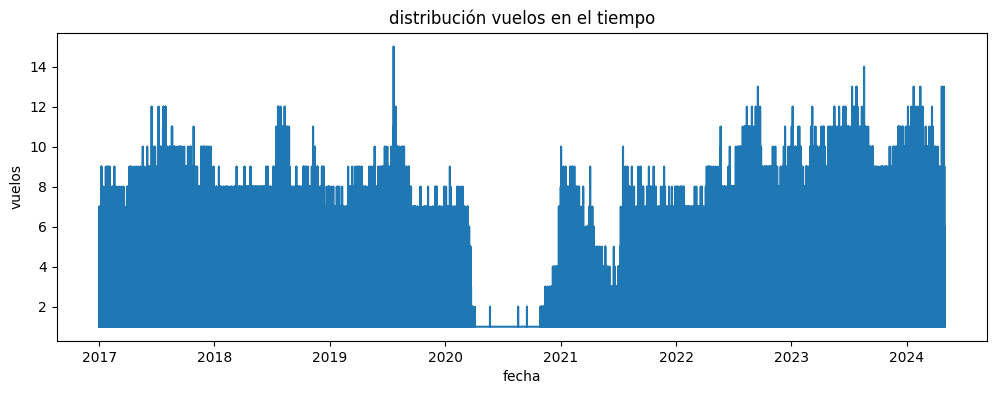

In [45]:
#variables
nombre_x = 'fecha'
nombre_y = 'vuelos'
x = df[nombre_x]
y = df[nombre_y]

#figura y conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 4))

#Creo el gráfico
ax.plot(x, y)

#etiqueto los ejes
ax.set_xlabel(f'{nombre_x}')
ax.set_ylabel(f'{nombre_y}')

#agrego título
ax.set_title(f'distribución vuelos en el tiempo')

plt.show()

Se observa en 2020 la caìda e inexistencia de vuelos, llama la atención también en el año 2019 un elevado número de vuelos que màs adelante analizaremos.

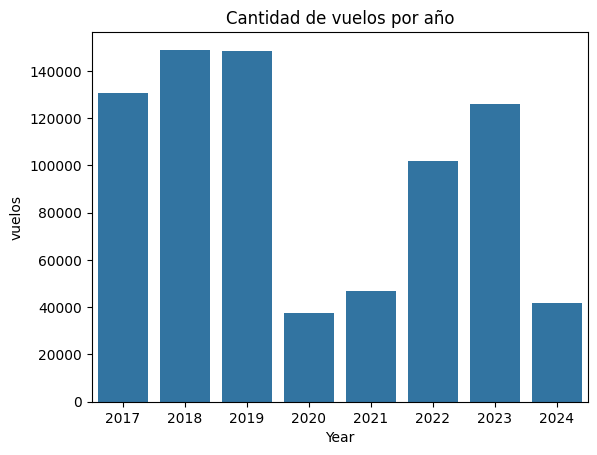

In [46]:
sns.countplot(data=df, x='Year')

# Agregar título
plt.title('Cantidad de vuelos por año')

# Agregar labels de ejes
plt.xlabel('Year')
plt.ylabel('vuelos')

plt.show()

Se observa claramente la caída en los vuelos en el año 2020 producto de la pandemia. Se decide eliminar los datos de ese año para que no generen dispersiones. El año 2024 solo tiene datos de 4 meses.

In [47]:
# Eliminar filas correspondientes al año 2020
df = df.loc[df['Year'] != 2020]

df['Year'].unique()

array([2017, 2018, 2019, 2021, 2022, 2023, 2024], dtype=int32)

In [48]:
df.describe().transpose()

count                           mean                  min  \
fecha        744045  2020-06-06 01:13:00.354414592  2017-01-01 00:00:00   
pasajeros  744045.0                     207.979782                  1.0   
asientos   744045.0                     255.229732                  1.0   
vuelos     744045.0                       1.589865                  1.0   
Year       744045.0                    2019.942314               2017.0   
Day        744045.0                      15.695197                  1.0   
DayOfWeek  744045.0                       2.997913                  0.0   
Month      744045.0                       6.382938                  1.0   
COP        744045.0                       0.792908             0.002941   
PROMAS     744045.0                     162.980852                  1.0   

                           25%                  50%                  75%  \
fecha      2018-05-15 00:00:00  2019-08-10 00:00:00  2022-11-05 00:00:00   
pasajeros                 93.0                158.0                266.0   
asientos                 128.0                186.0                329.0   
vuelos                     1.0                  1.0                  2.0   
Year                    2018.0               2019.0               2022.0   
Day                        8.0                 16.0                 23.0   
DayOfWeek                  1.0                  3.0                  5.0   
Month                      3.0                  6.0                 10.0   
COP                   0.703125             0.838624             0.933333   
PROMAS                    96.0                170.0                186.0   

                           max         std  
fecha      2024-04-30 00:00:00         NaN  
pasajeros               2353.0  170.516964  
asientos                2465.0  193.382024  
vuelos                    15.0    1.120548  
Year                    2024.0     2.36825  
Day                       31.0    8.776815  
DayOfWeek                  6.0    2.005398  
Month                     12.0    3.550335  
COP                        1.0    0.182493  
PROMAS                   524.0    67.90928

Los datos siguen siendo asimétricos, pero considero que pueden ser más representativos al no tener la dispersión de los movimientos nulos del período de pandemia.

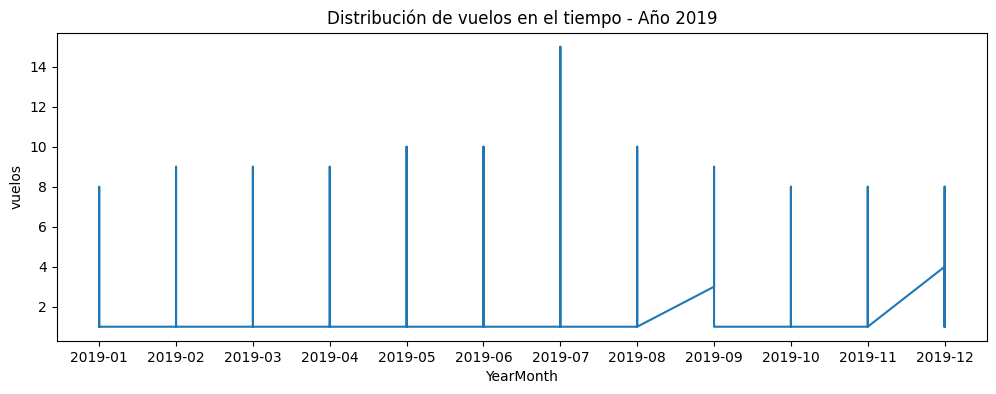

In [49]:
# Convertimos el índice 'YearMonth' a cadenas de texto
df['YearMonth'] = df['YearMonth'].astype(str)

# Variables
nombre_x = 'YearMonth'
nombre_y = 'vuelos'

# Filtramos datos por año
año_df = 2019
df_filtrado = df[df['YearMonth'].str.startswith(str(año_df))]

x = df_filtrado[nombre_x]
y = df_filtrado[nombre_y]

# Figura y conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 4))

# Creamos el gráfico
ax.plot(x, y)

# Etiquetamos los ejes
ax.set_xlabel(f'{nombre_x}')
ax.set_ylabel(f'{nombre_y}')

# Agregamos título con el año filtrado
ax.set_title(f'Distribución de vuelos en el tiempo - Año {año_df}')

plt.show()

Se observa en el mes de julio un aumento significativo de los vuelos, pudiendo relacionarlo con el comienzo de las vacaciones de invierno en Argentina.

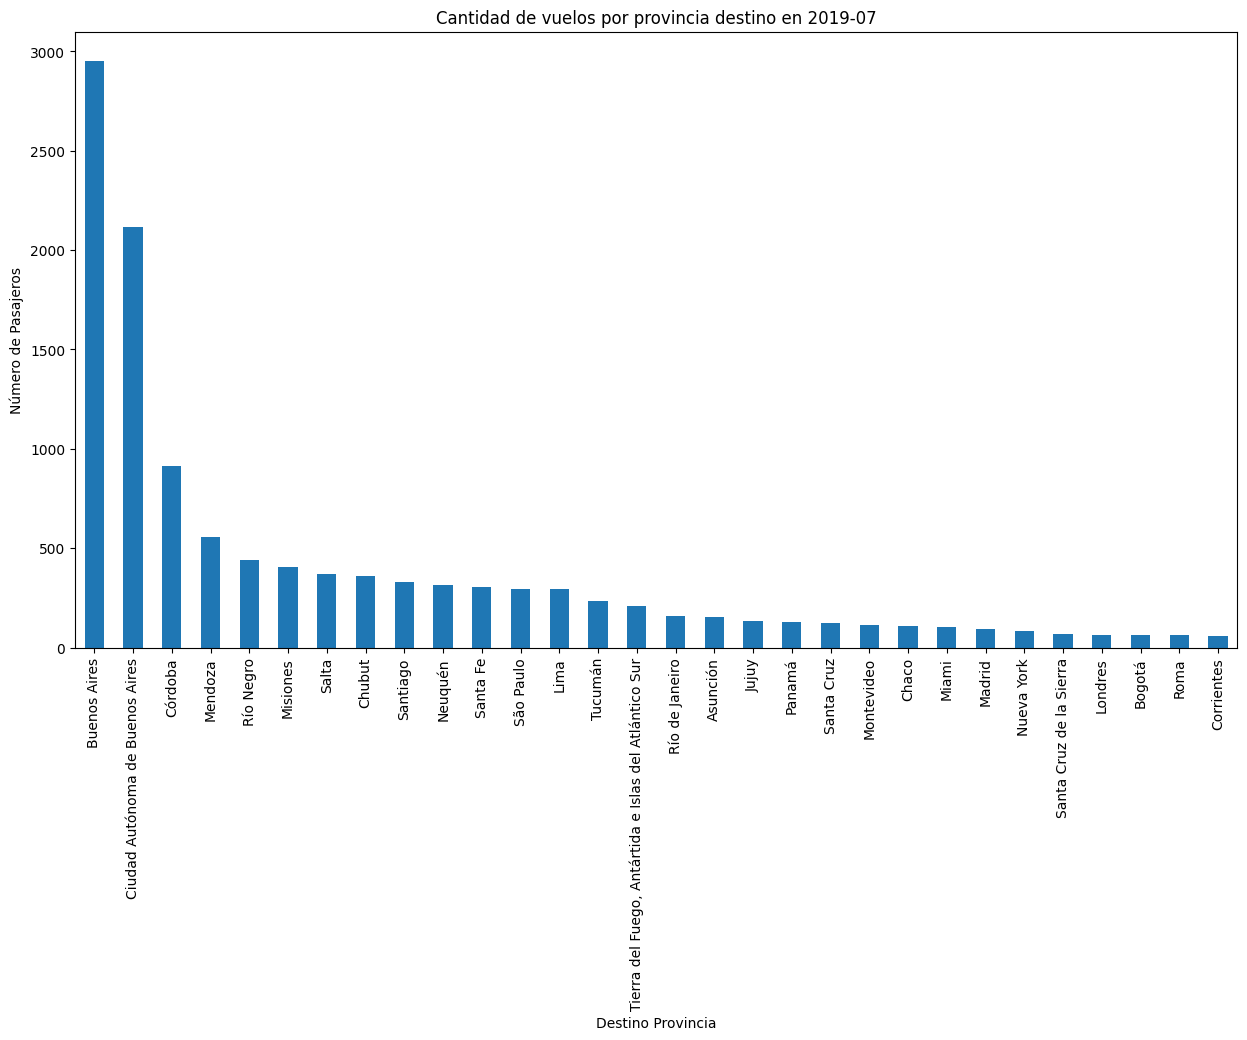

In [50]:
# Filtramos los datos para incluir solo America del Sur
YearMonth_df = '2019-07'
df_filtrado = df[df['YearMonth'].astype(str) == YearMonth_df]

# Contamos la cantidad de vuelos por provincia
conteo_por_provincia = df_filtrado['destino_provincia'].value_counts().head(30)

# Creamos el gráfico
plt.figure(figsize=(15, 8))

# Graficamos los datos
conteo_por_provincia.plot(kind='bar')


# Agregamos título y labels de ejes
plt.title(f'Cantidad de vuelos por provincia destino en {YearMonth_df}')
plt.xlabel('Destino Provincia')
plt.ylabel('Número de Pasajeros')


# Agregamos etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar el gráfico
plt.show()

La mayor cantidad de vuelos en el perìodo analizado en julio 2019 fue con destino a Buenos Aires.

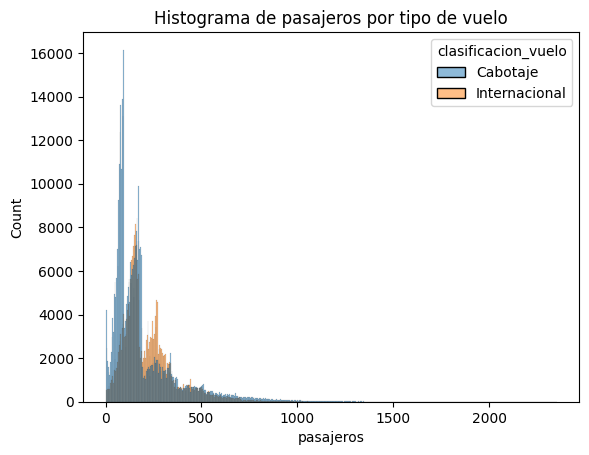

In [51]:
sns.histplot(data=df,x='pasajeros',hue='clasificacion_vuelo')
plt.title('Histograma de pasajeros por tipo de vuelo')
plt.show()

En el histograma se puede ver la distribución bimodal de dos realidades distintas, mayoritaria de vuelos de cabotaje sobre internacionales y un comportamiento atípico posiblemente relacionado a las aerolíneas y el tipo de avion y capacidad según sea de cabotaje o internacional.

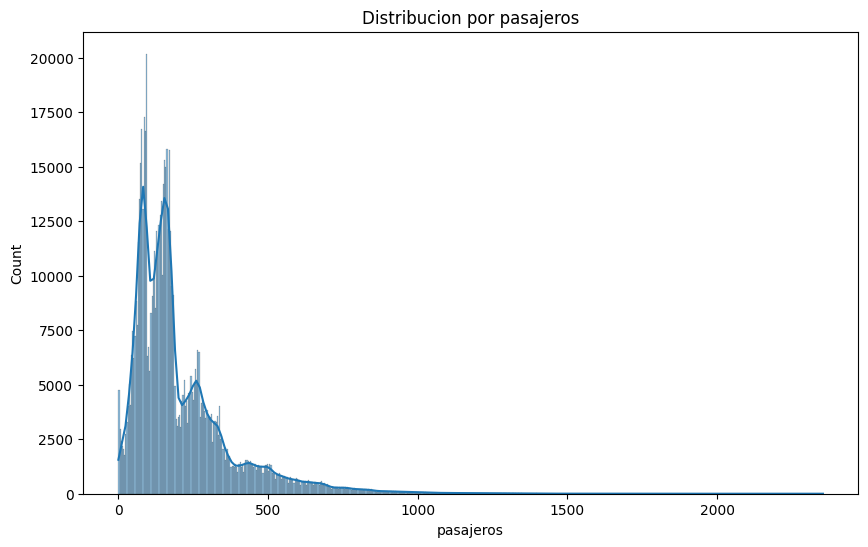

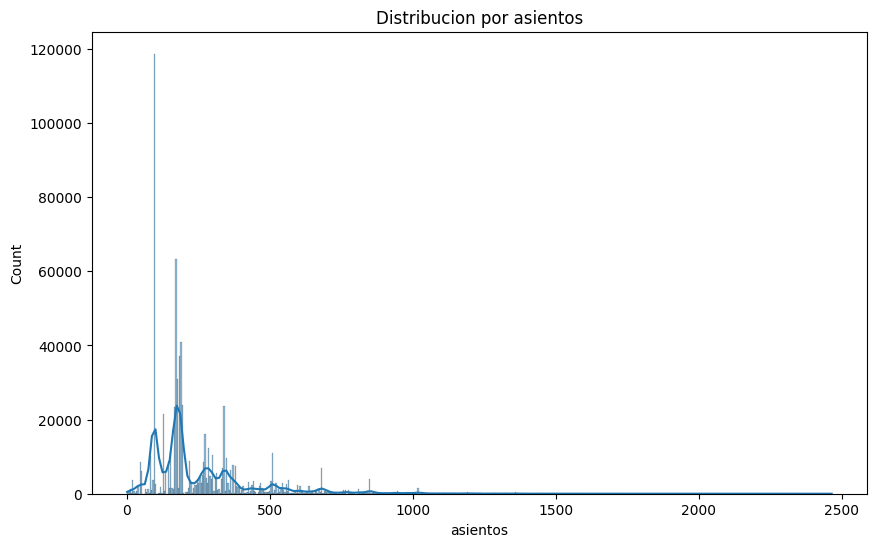

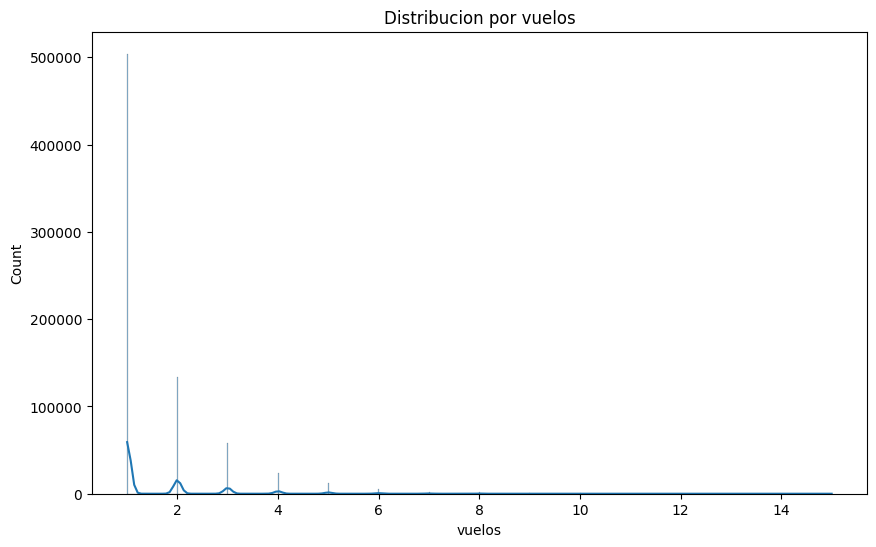

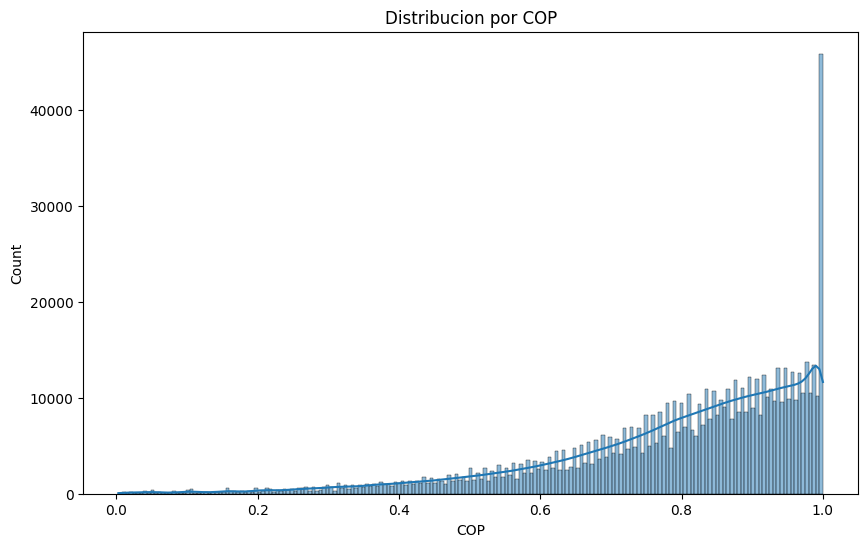

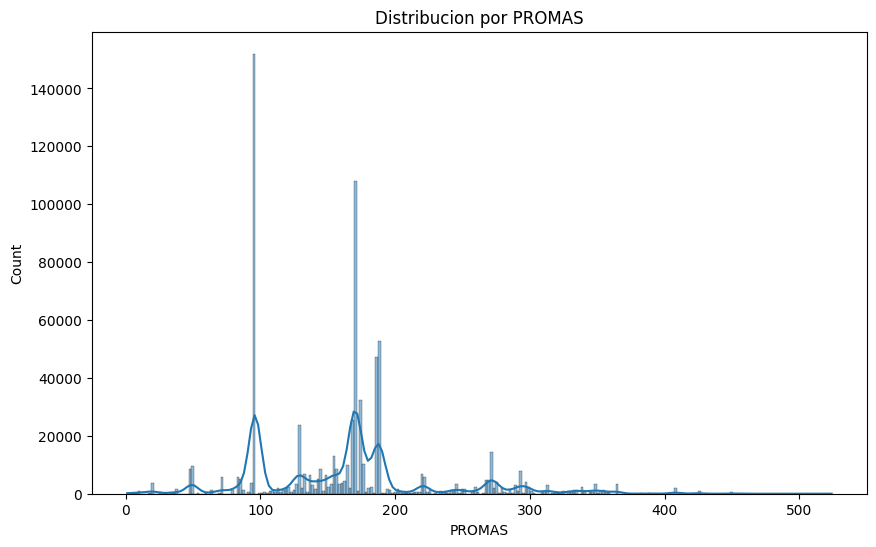

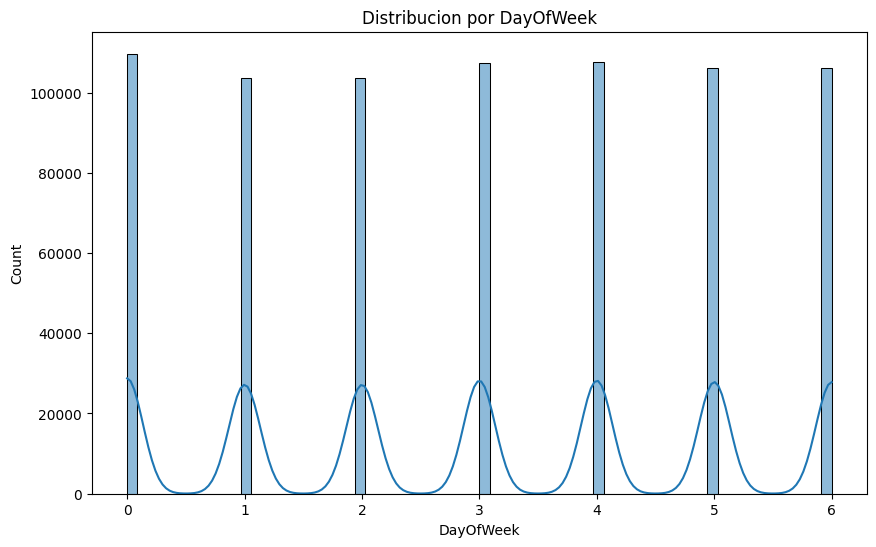

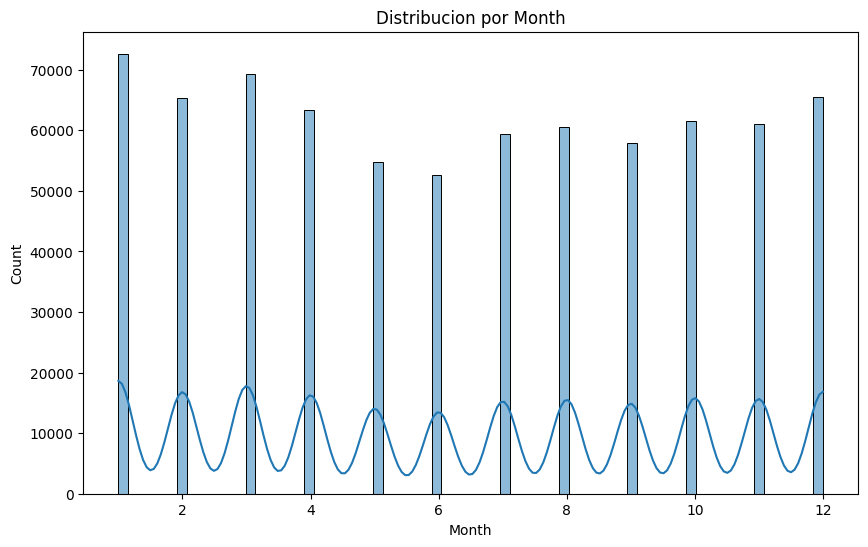

In [52]:
# Defino las variables continuas
variables_continuas = ['pasajeros','asientos', 'vuelos', 'COP', 'PROMAS','DayOfWeek','Month']

# Ploteo de histogramas para variables continuas
for var in variables_continuas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribucion por {var}')
    plt.show()

Estos histogramas pueden llegar a mostrar las diferencias entre aerolíneas y vuelos, por ejemplo en el promedio de asientos existen desvíos.

Vemos que en los meses enero, marzo y diciembre se producen la mayor cantidad de vuelos.

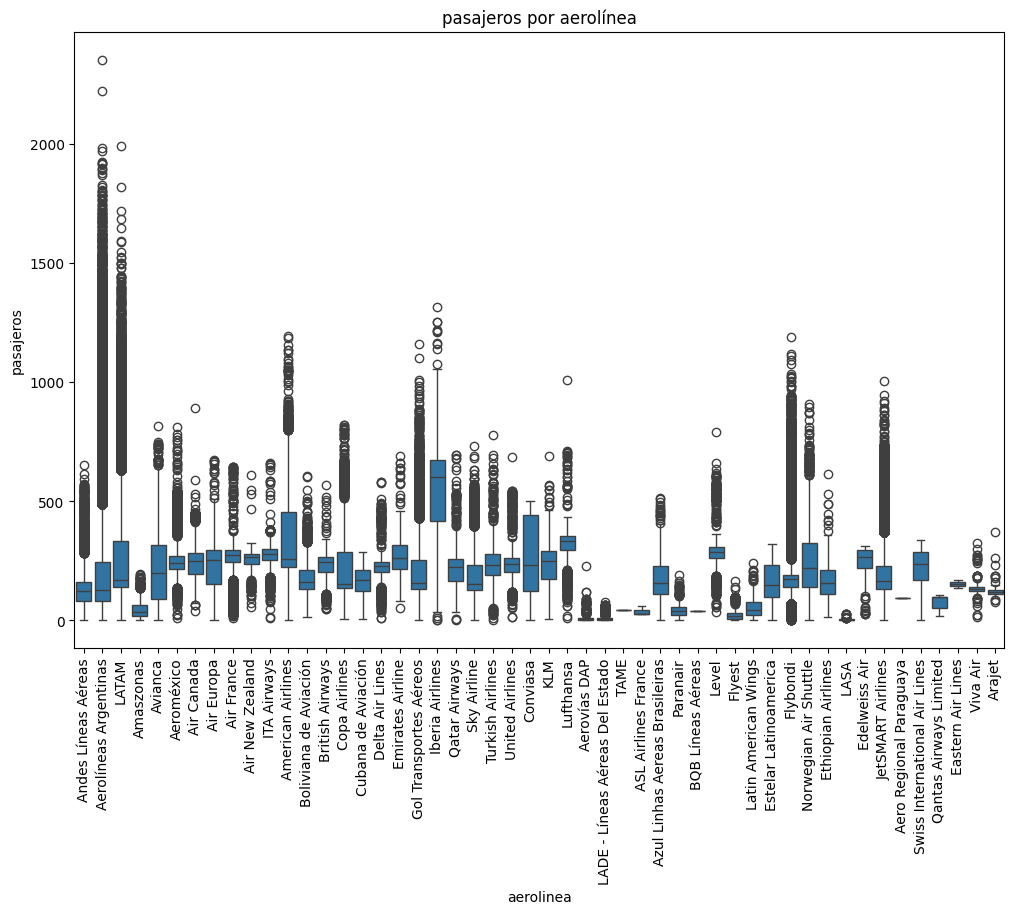

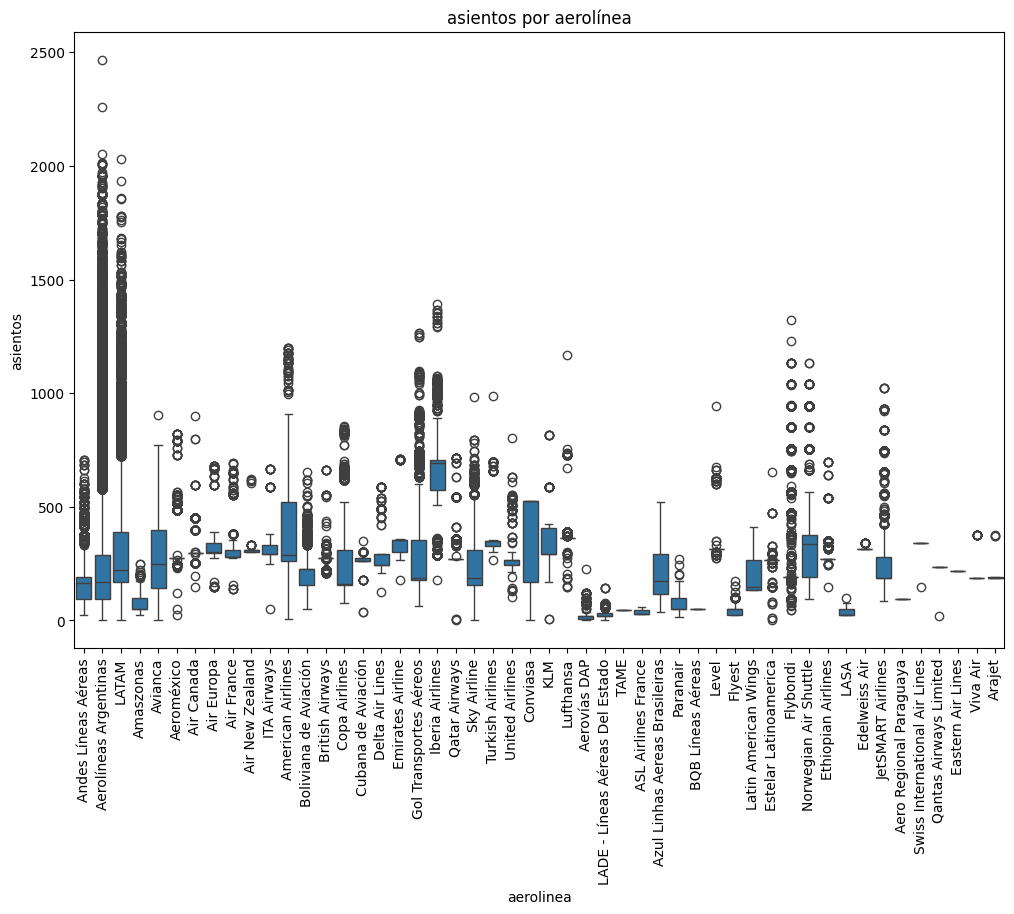

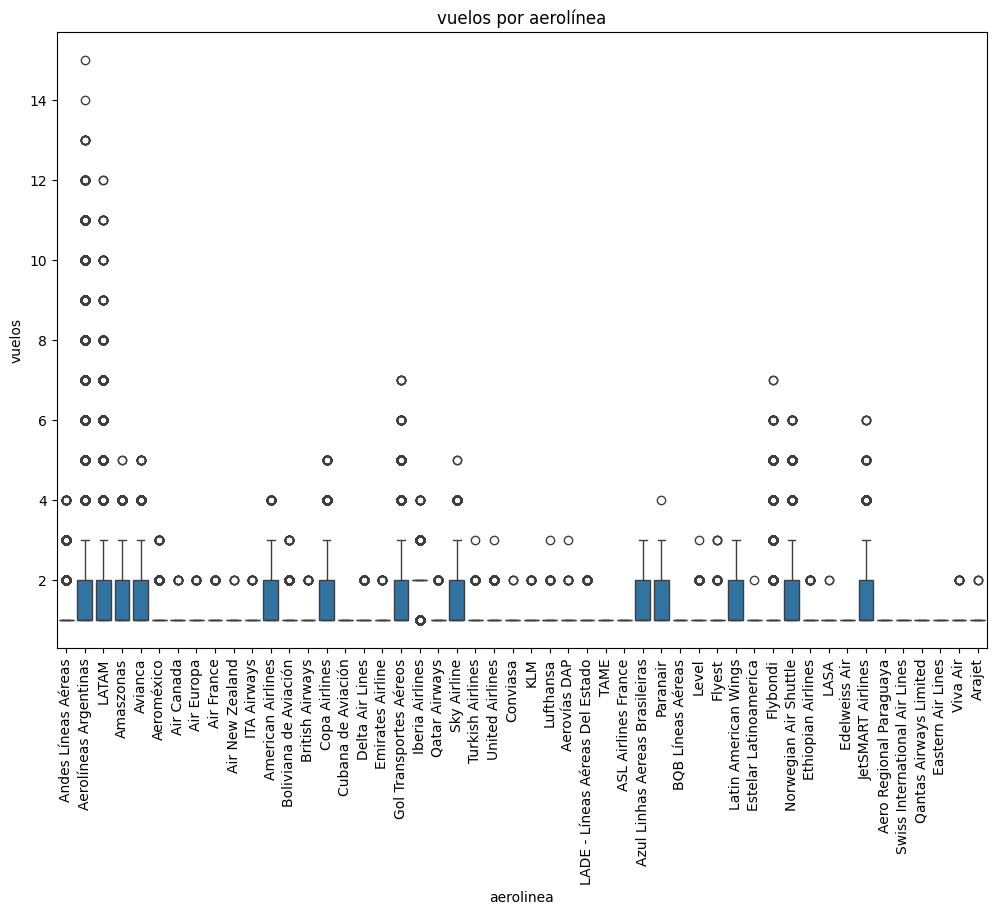

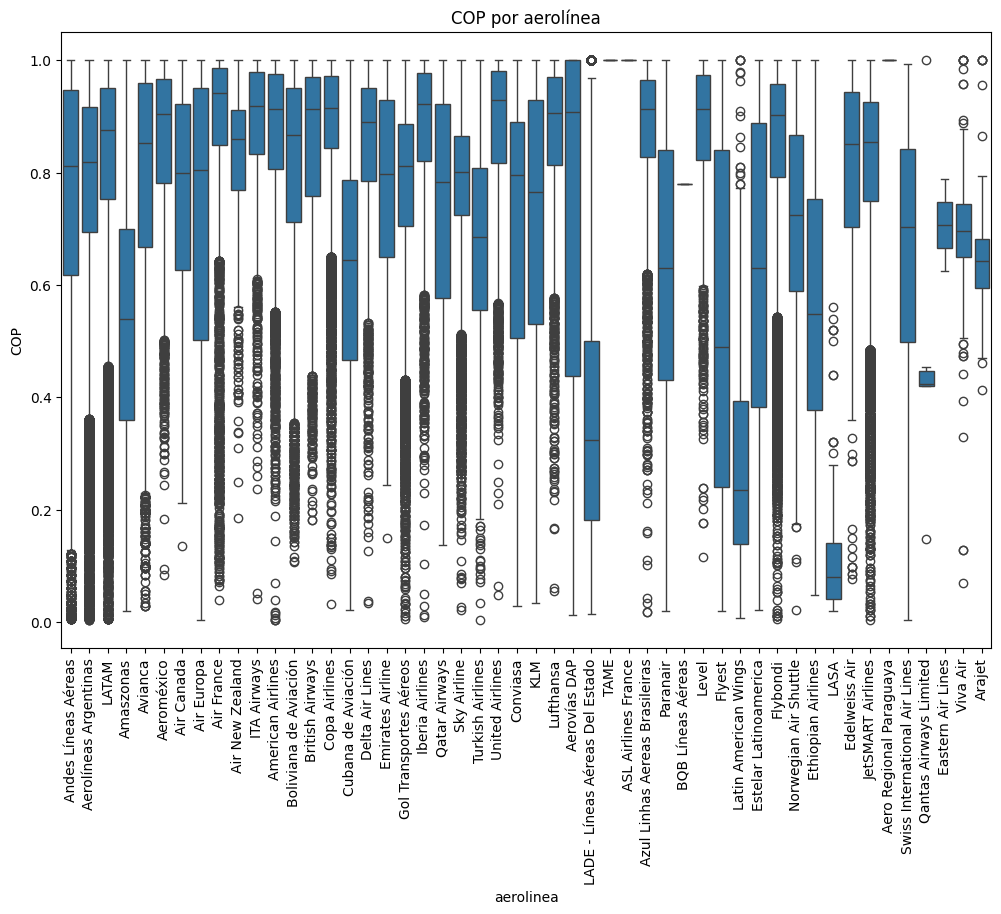

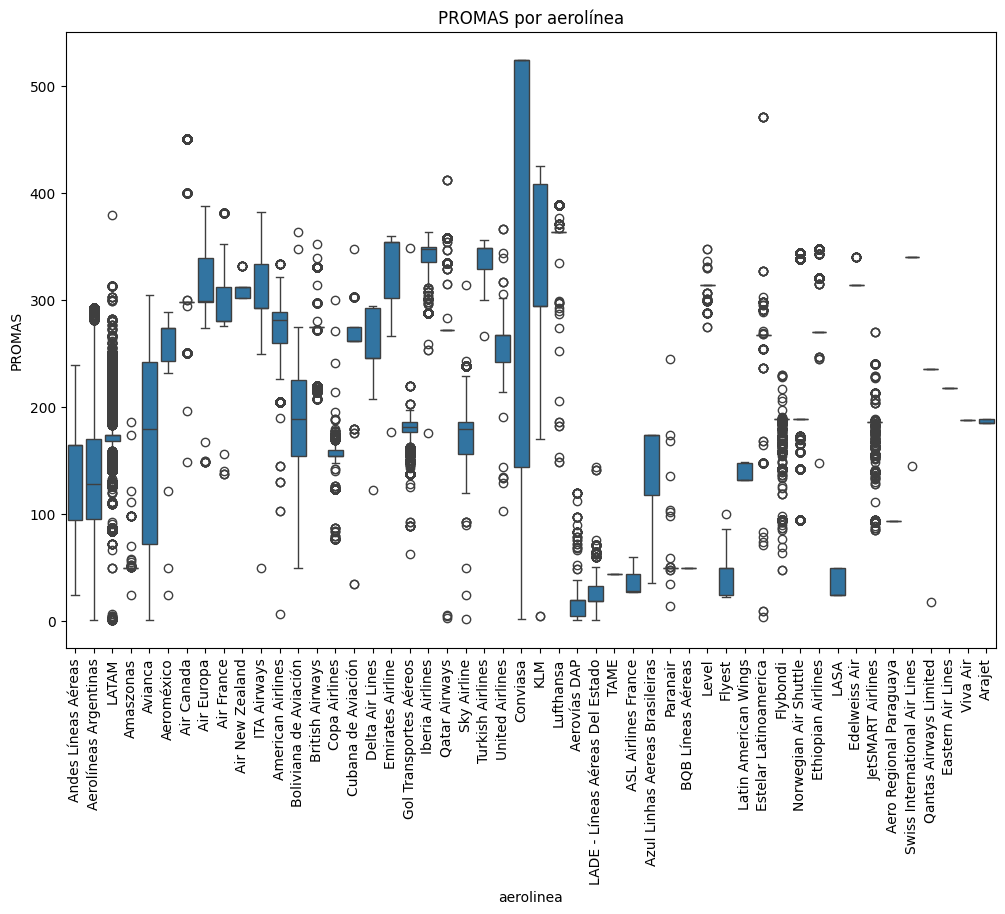

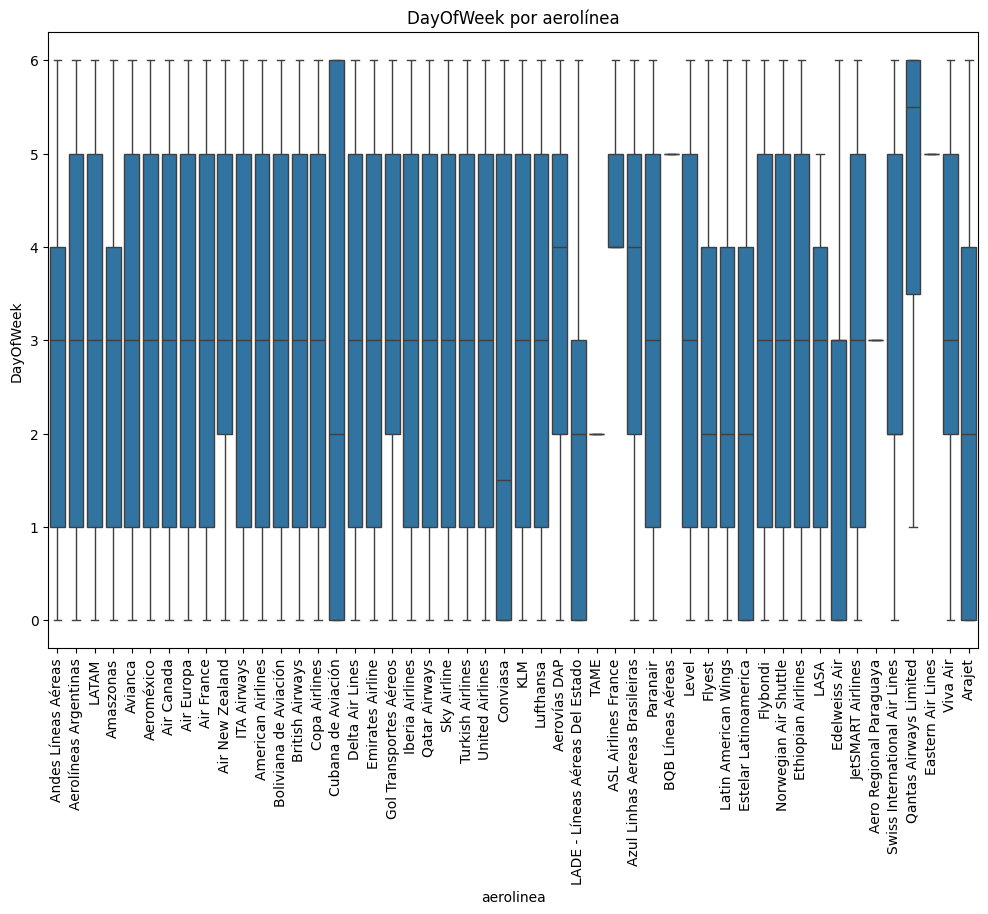

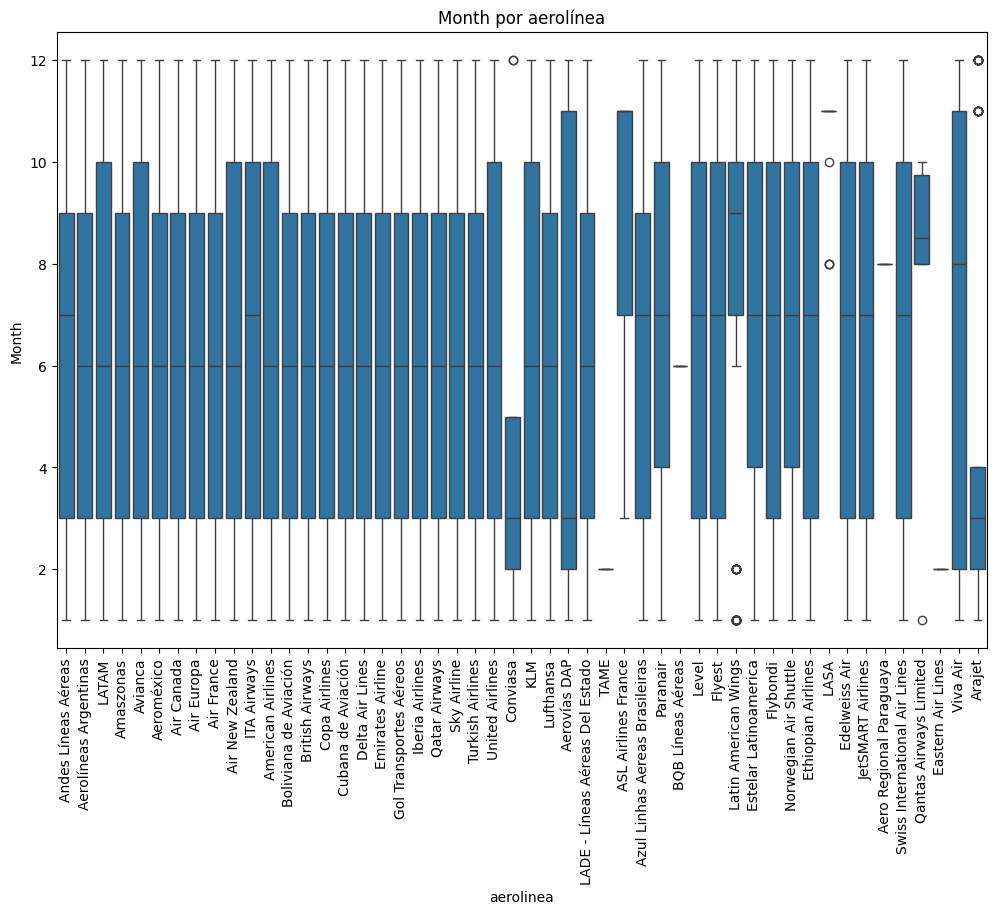

In [53]:
# Ploteo de boxplots para variables continuas
for var in variables_continuas:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='aerolinea', y=var, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{var} por aerolínea')
    plt.show()

Podemos ver que existe dispersión según la aerolínea elegida, donde claramente es preponderante la aerolínea local "Aerolíneas Argentinas"


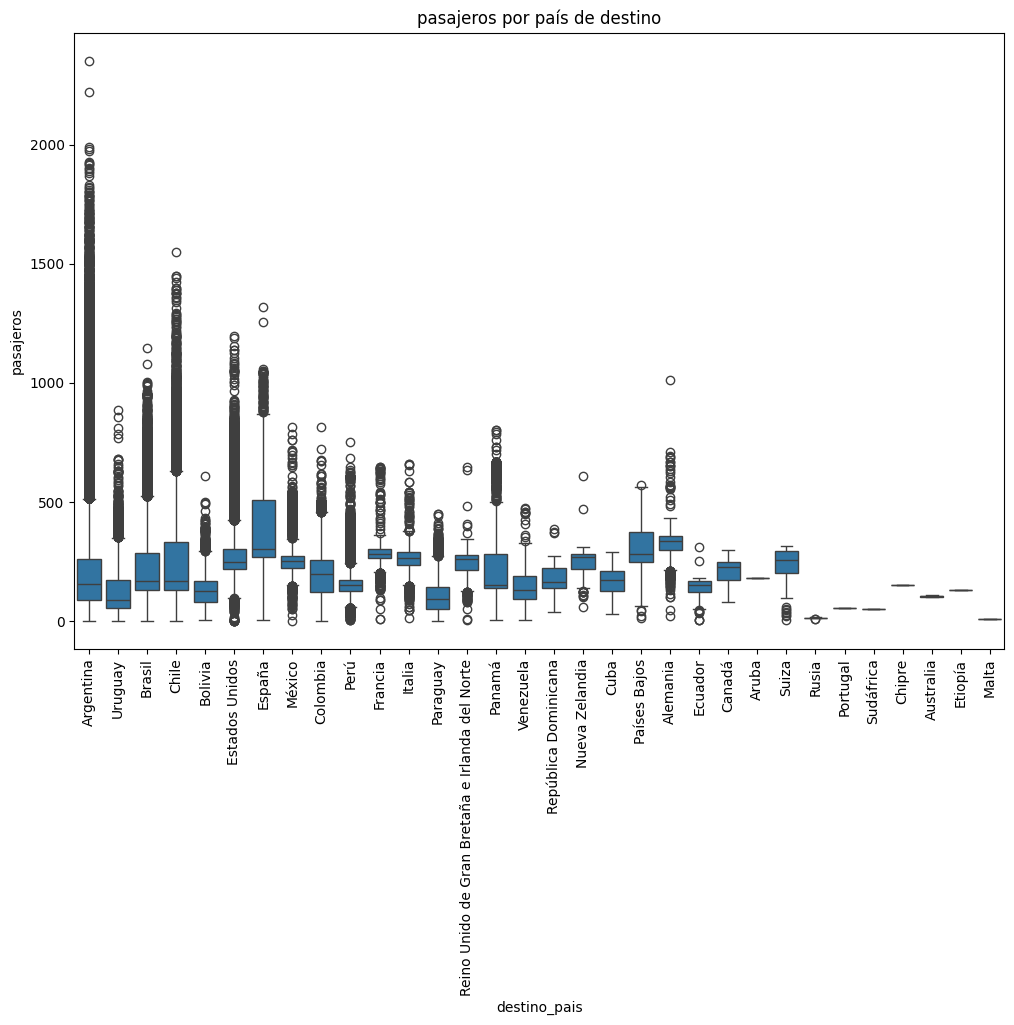

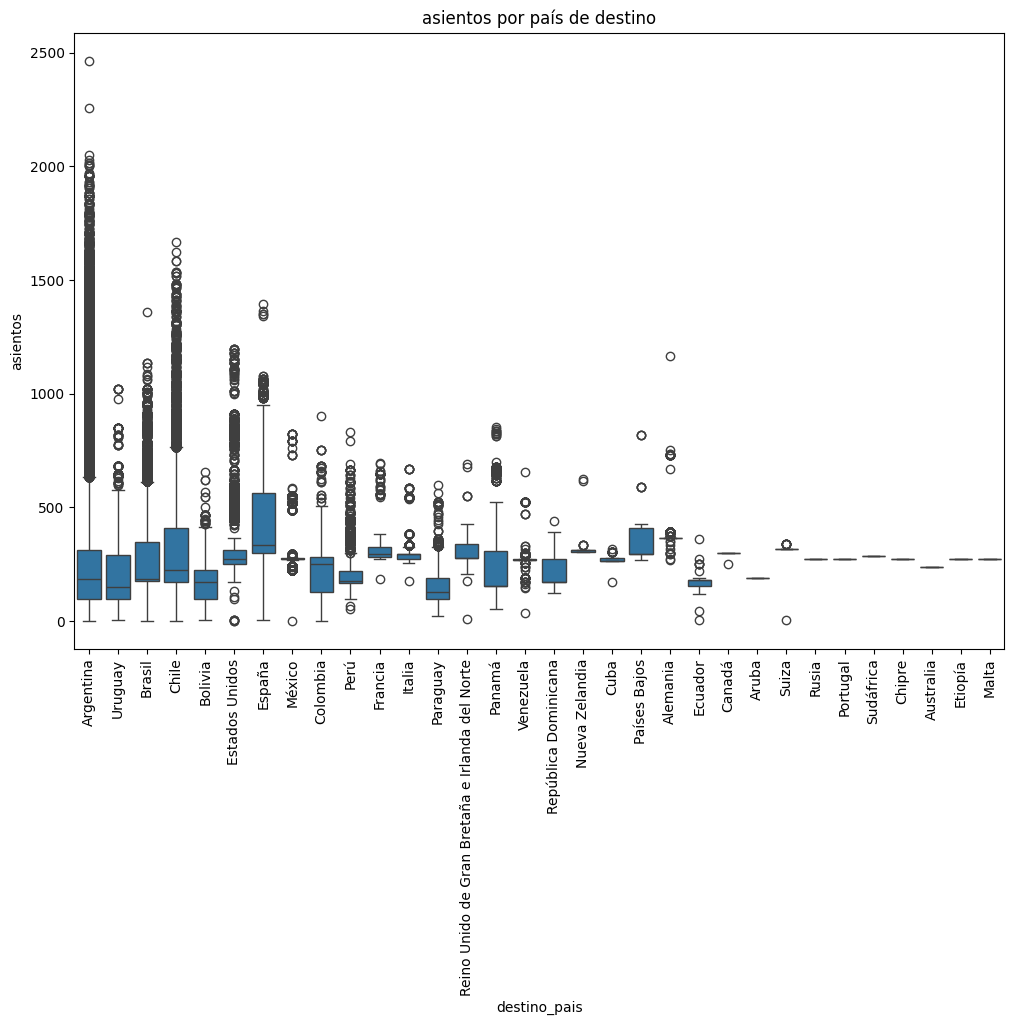

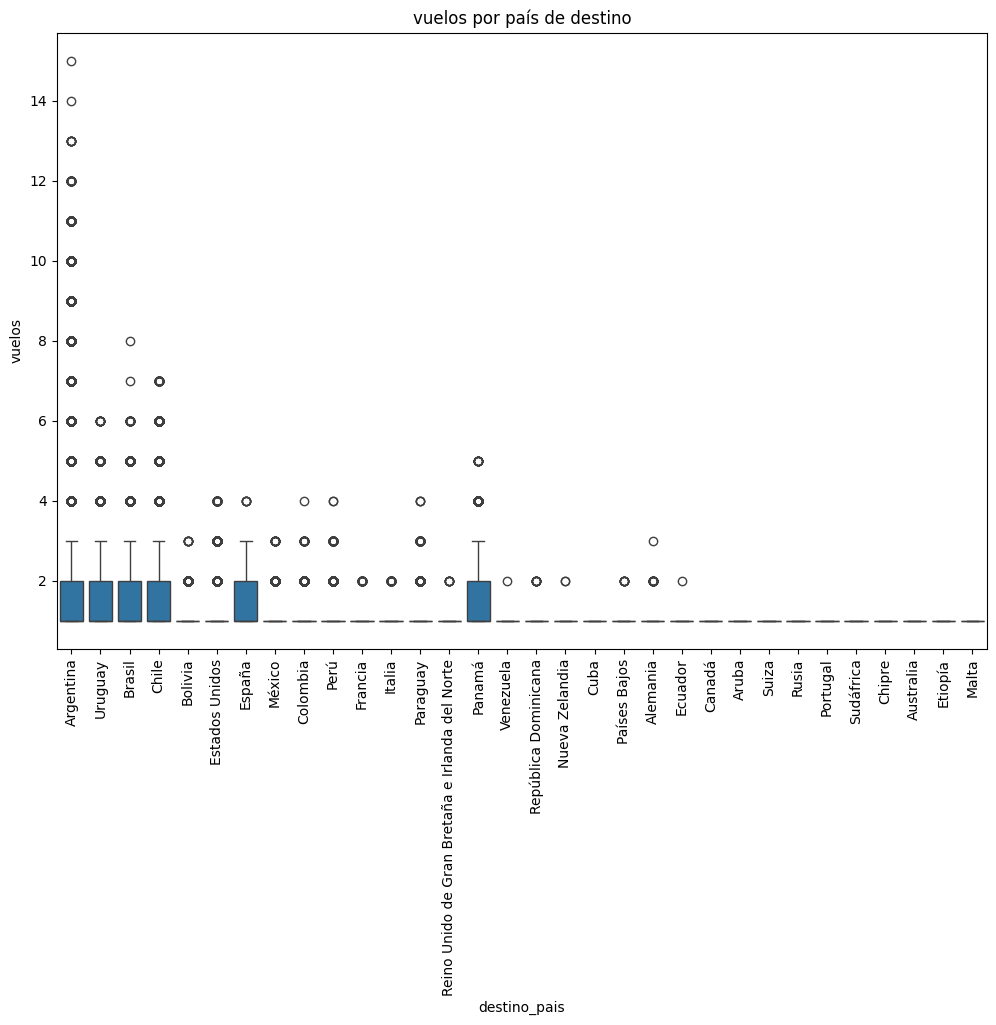

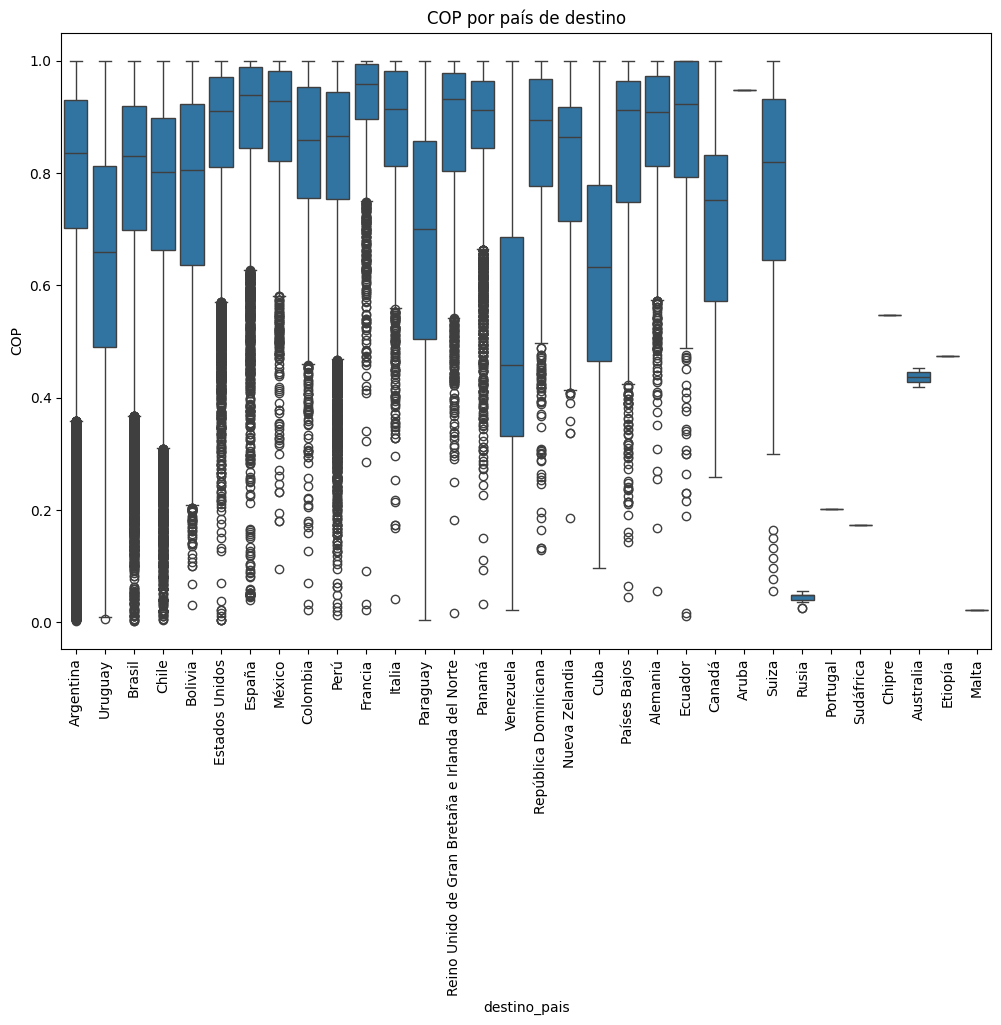

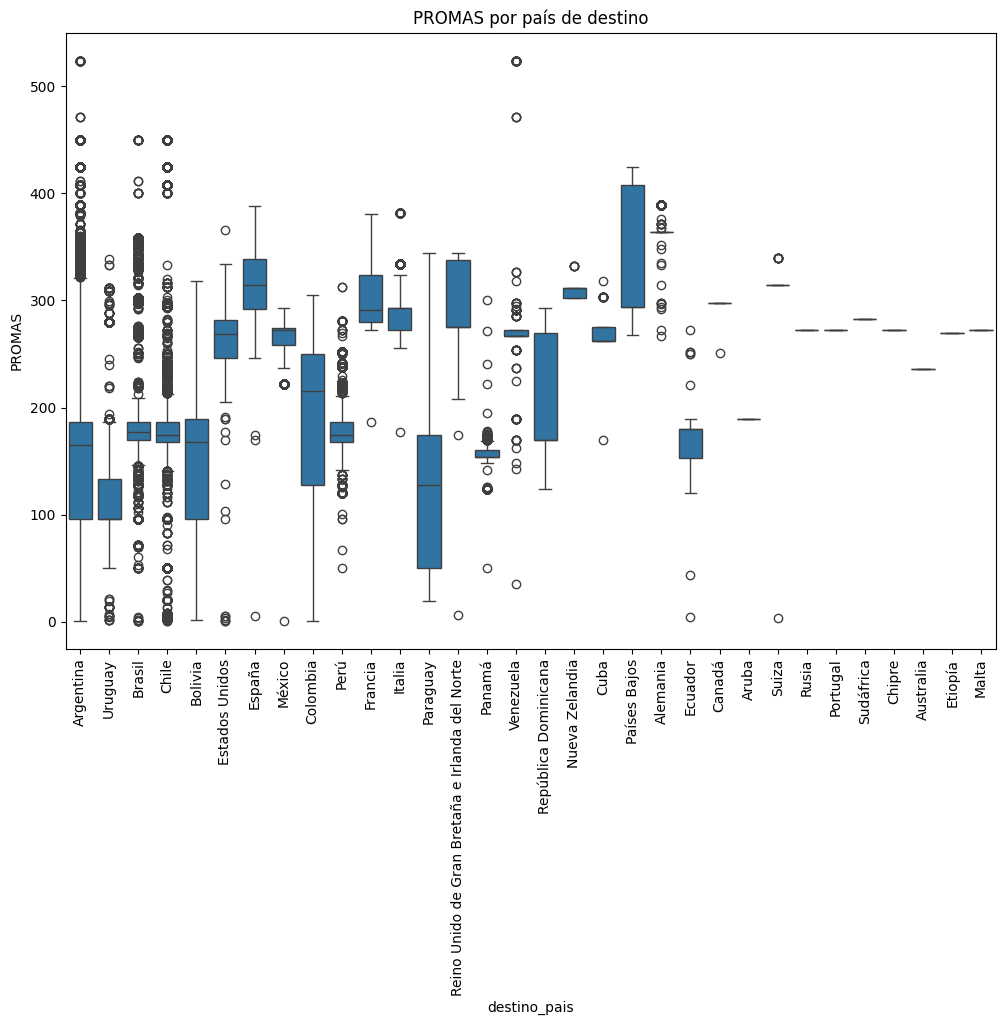

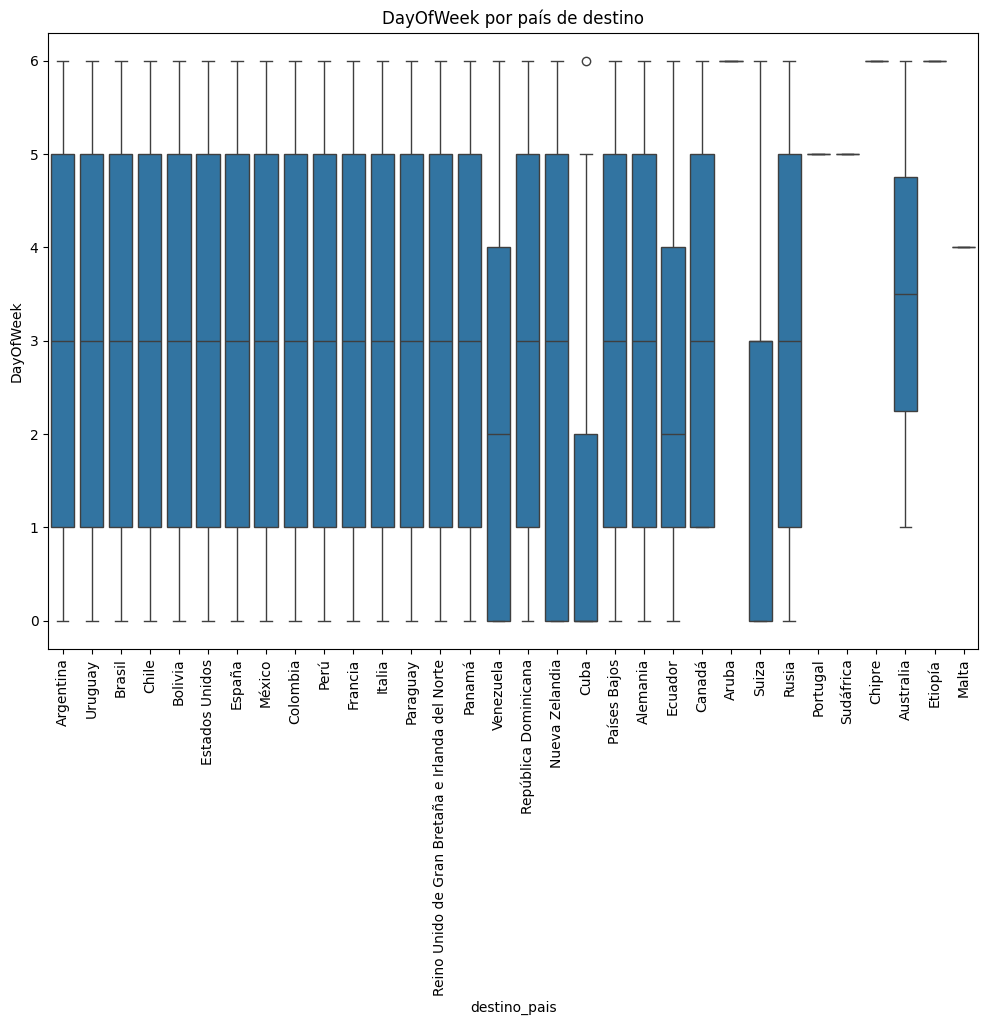

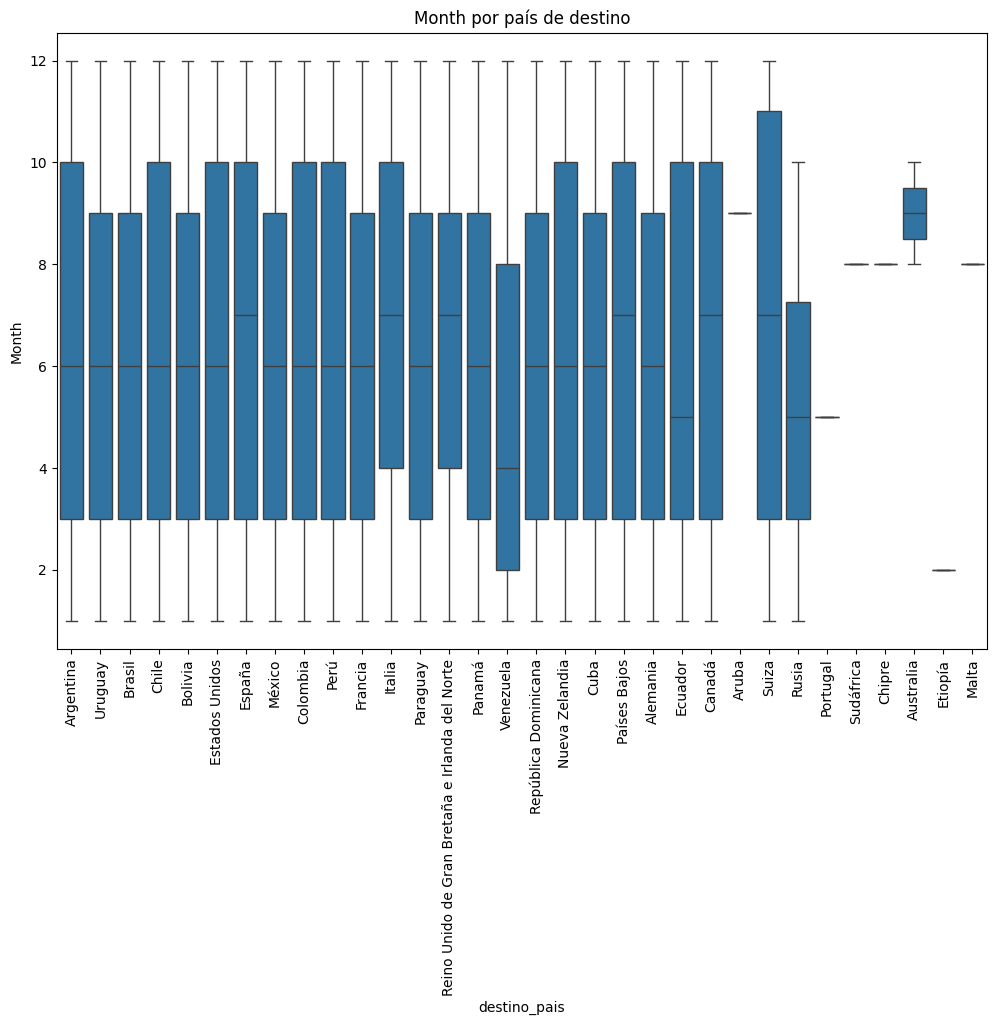

In [54]:
# Ploteamos boxplots para variables continuas
for var in variables_continuas:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='destino_pais', y=var, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{var} por país de destino')
    plt.show()

PAIRPLOTS

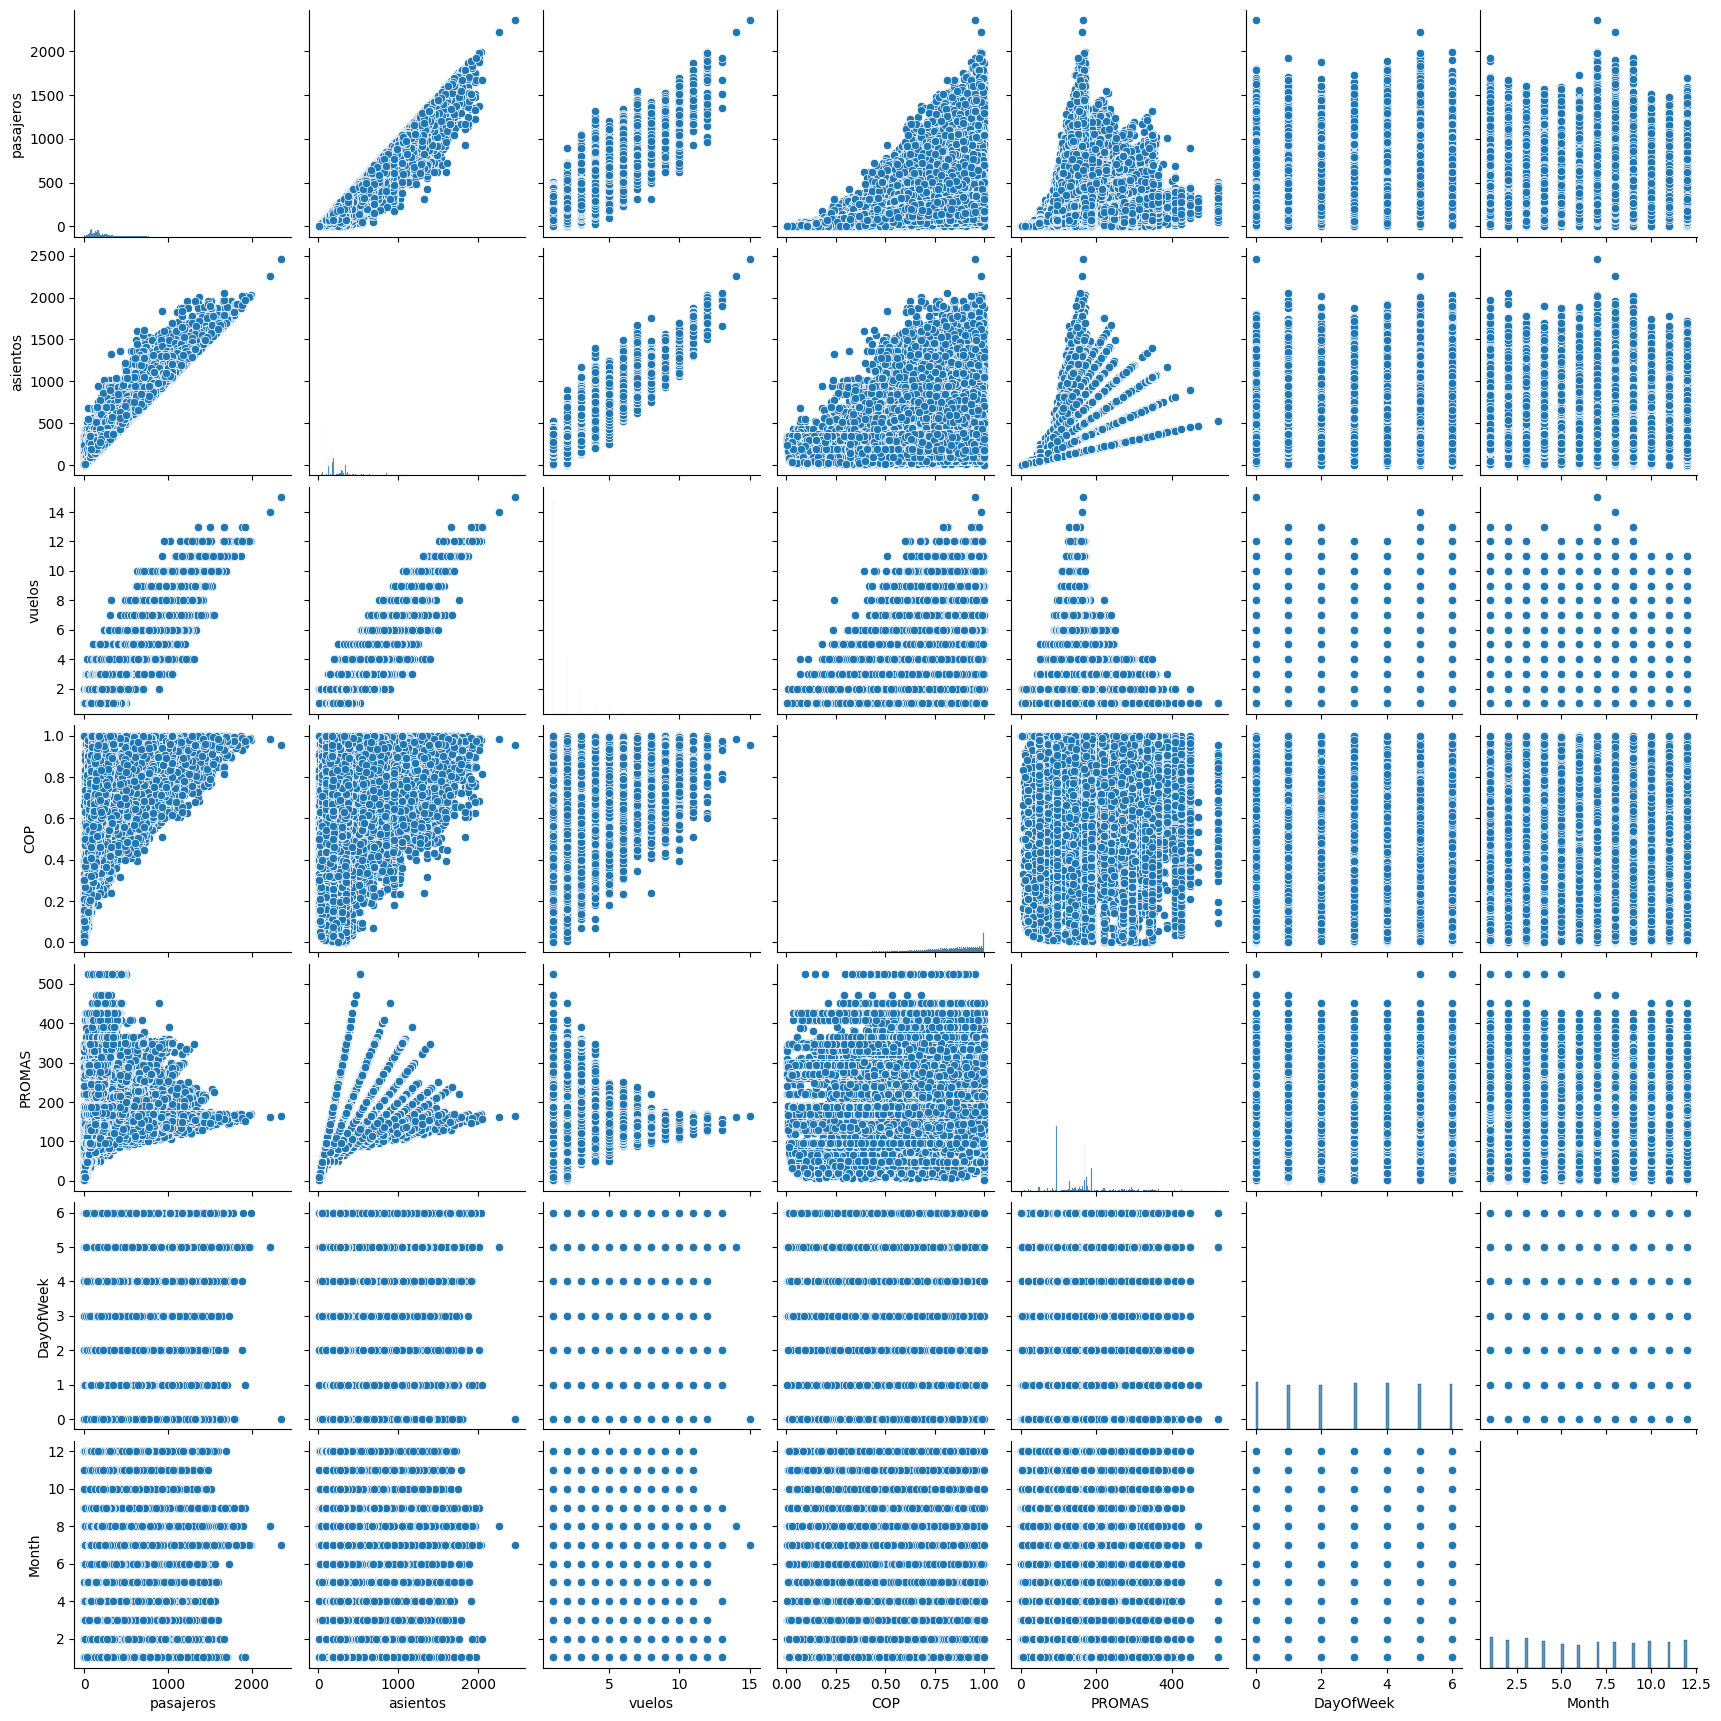

In [55]:
# Pairplot para variables continuas
sns.pairplot(df[variables_continuas])
plt.show()

Podemos ver la correlación positva entre asientos y pasajeros, como de vuelos y pasajeros y asientos.

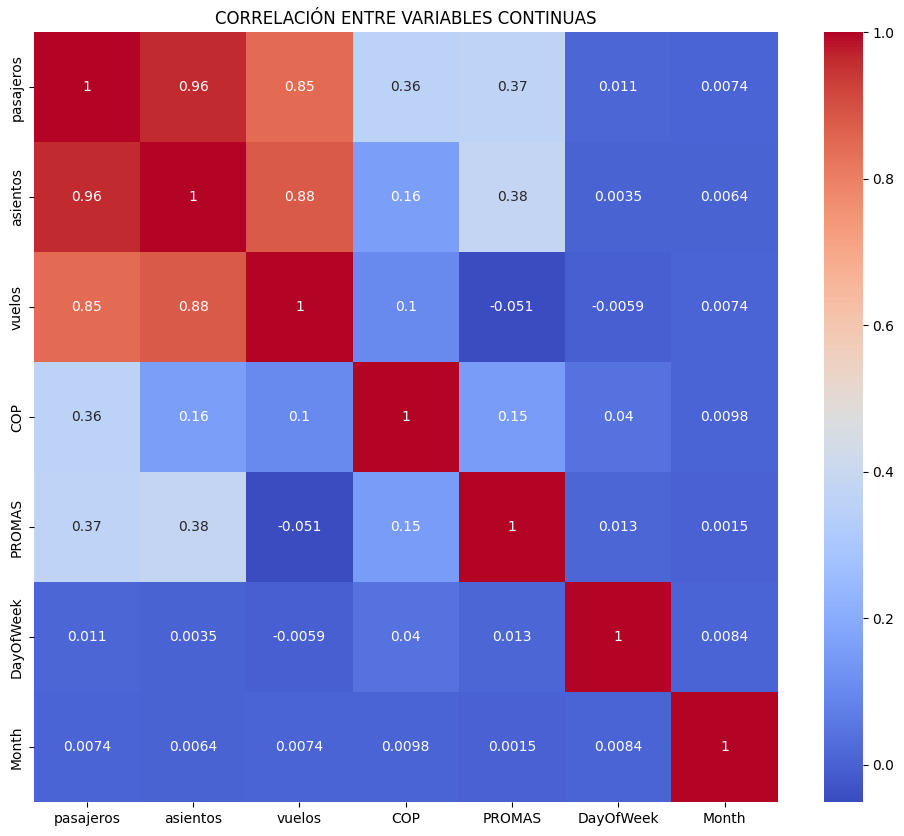

In [56]:
# Matriz de correlación
corr = df[variables_continuas].corr()

# Ploteo de heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('CORRELACIÓN ENTRE VARIABLES CONTINUAS')
plt.show()

En este Heatmap podemos ver mejor la correlación existente entre asientos y pasajeros, vuelos con asientos y pasajeros.
La variable Dayofweek no guarda relación con las demás variables.


In [57]:
#Estratificamos el data frame por destino continente
df_asur =  df[(df['destino_continente'] == 'América del Sur') & (df['clasificacion_vuelo'] == 'Internacional')]
df_anor = df[(df['destino_continente'] == 'América del Norte') & (df['clasificacion_vuelo'] == 'Internacional')]
df_eu = df[(df['destino_continente'] == 'Europa') & (df['clasificacion_vuelo'] == 'Internacional')]
df_oc = df[(df['destino_continente'] == 'Oceanía') & (df['clasificacion_vuelo'] == 'Internacional')]
df_ac = df[(df['destino_continente'] == 'América Central y Caribe') & (df['clasificacion_vuelo'] == 'Internacional')]
df_af = df[(df['destino_continente'] == 'África') & (df['clasificacion_vuelo'] == 'Internacional')]
df_asia = df[(df['destino_continente'] == 'Asia') & (df['clasificacion_vuelo'] == 'Internacional')]

In [58]:
#Mensualizamos las cantidades de pasajeros por año
asur_cant = df_asur.groupby('Year')['pasajeros'].sum()
anor_cant = df_anor.groupby('Year')['pasajeros'].sum()
eu_cant = df_eu.groupby('Year')['pasajeros'].sum()
ac_cant = df_ac.groupby('Year')['pasajeros'].sum()
af_cant = df_af.groupby('Year')['pasajeros'].sum()
asia_cant = df_asia.groupby('Year')['pasajeros'].sum()
oc_cant = df_oc.groupby('Year')['pasajeros'].sum()


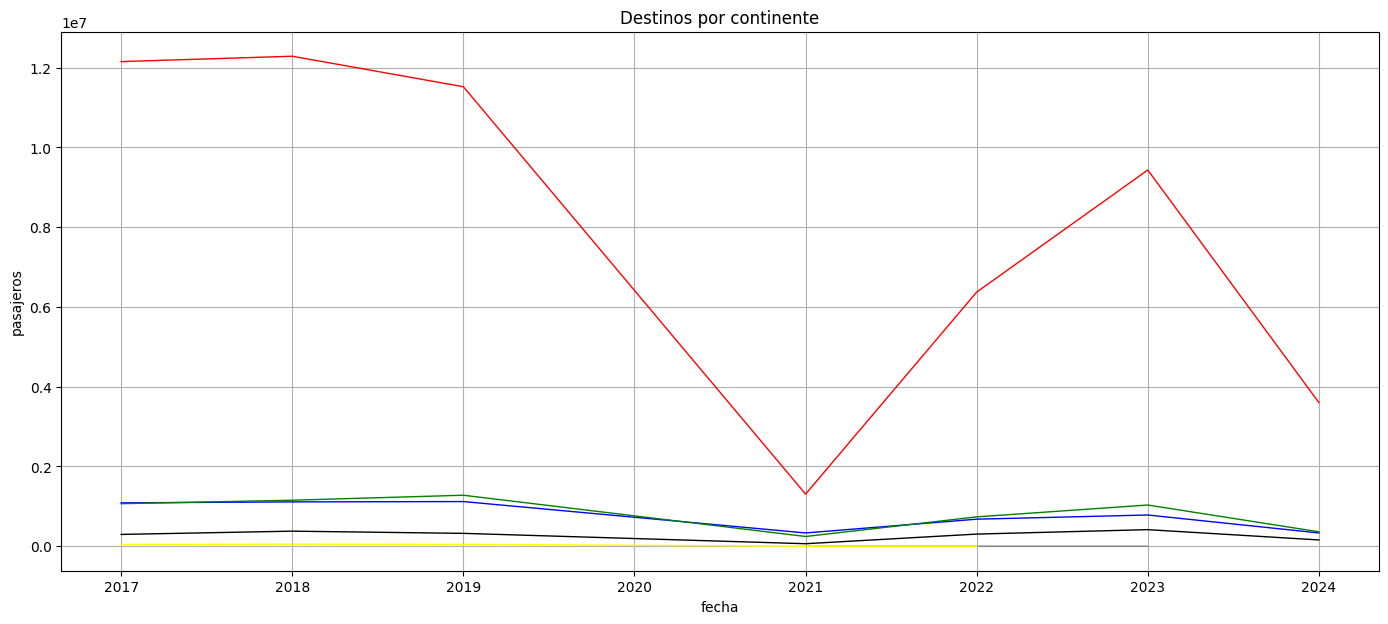

In [59]:
#Visualizamos a traves de gráfico de líneas los destinos por continente por año
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
ax.plot(asur_cant ,linewidth=1 , color = 'red' )
ax.plot(anor_cant ,linewidth=1 , color = 'blue' )
ax.plot(eu_cant ,linewidth=1 , color = 'green')
ax.plot(ac_cant ,linewidth=1 , color = 'black')
ax.plot(af_cant ,linewidth=1 , color = 'grey')
ax.plot(asia_cant ,linewidth=1 , color = 'brown')
ax.plot(oc_cant ,linewidth=1 , color = 'yellow')

ax.set(xlabel='fecha', ylabel='pasajeros',
       title='Destinos por continente')
ax.grid()
#fig.savefig("Variacion.png")
plt.show()


Este gráfico muestra, que a pesar de haber filtrado por vuelos internacionales, los destinos de América del sur siguen siendo los más elegidos dentro de este data frame. A continuación se omite América del sur para visualizar los demás con mayor detalle.

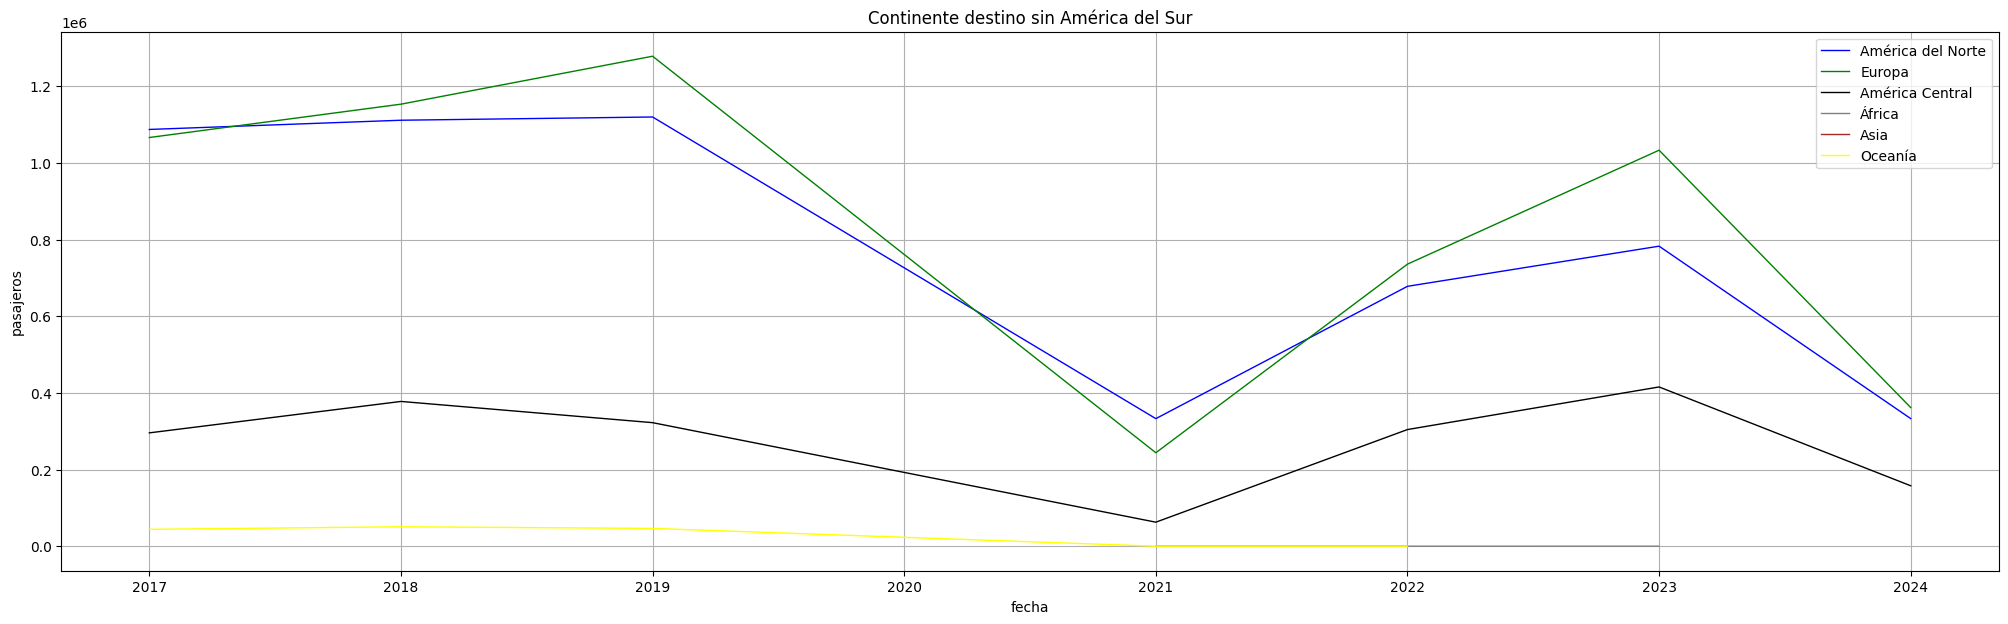

In [60]:
#Grafico de lineas de viajes por continente por año sin América del Sur
fig, ax = plt.subplots()
fig.set_size_inches(25, 7)
ax.plot(anor_cant ,linewidth=1 , color = 'blue' , label='América del Norte')
ax.plot(eu_cant, linewidth=1, color='green', label='Europa')
ax.plot(ac_cant, linewidth=1, color='black', label='América Central')
ax.plot(af_cant, linewidth=1, color='grey', label='África')
ax.plot(asia_cant, linewidth=1, color='brown', label='Asia')
ax.plot(oc_cant, linewidth=1, color='yellow', label='Oceanía')

ax.set(xlabel='fecha', ylabel='pasajeros',
       title='Continente destino sin América del Sur')
ax.grid()
ax.legend()
fig.savefig("Variacion.png")
plt.show()


Se observa que después de América del sur, Europa es el destino más elegido, seguido por América del Norte.
En este caso no sirviò eliminar previamente el año 2020 de pandemia.

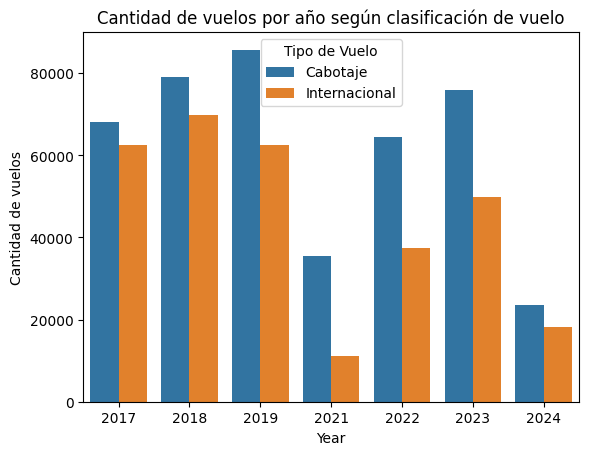

In [61]:
# Graficamos nuevamente un gràfico de barras por año y por canidad de vuelos pero agregando clasificación de vuelo
sns.countplot(data=df, x='Year', hue='clasificacion_vuelo')

# Agregar título
plt.title('Cantidad de vuelos por año según clasificación de vuelo')

# Agregar etiquetas de ejes
plt.xlabel('Year')
plt.ylabel('Cantidad de vuelos')

# Mostrar leyenda
plt.legend(title='Tipo de Vuelo')

# Mostrar el gráfico
plt.show()

Recordamos que se eliminó el año 2020 del análisis y vemos que en 2021 empezaron los vuelos internacionales fueron muy bajos comparados con los de cabotaje.

<ipython-input-62-ad3a8542eb01>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='destino_continente', palette='Set2')


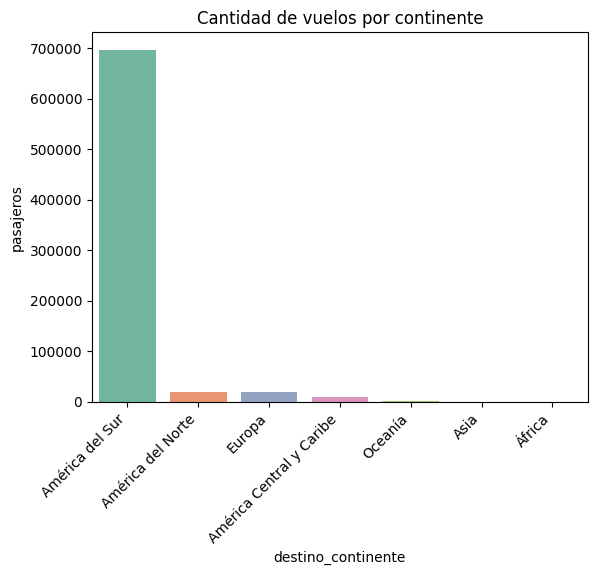

In [62]:
#Qué cantidad de pasajeros viajó a cada continente?
sns.countplot(data=df, x='destino_continente')

# Agregar título
plt.title('Cantidad de vuelos por continente')

# Agregar labels de ejes
plt.xlabel('destino_continente')
plt.ylabel('pasajeros')


plt.xticks(rotation=45, ha='right')
sns.countplot(data=df, x='destino_continente', palette='Set2')
plt.show()

<ipython-input-63-3ec2b98f5292>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filt, x='destino_provincia', order=conteo_por_provincia.index, palette='Set2')


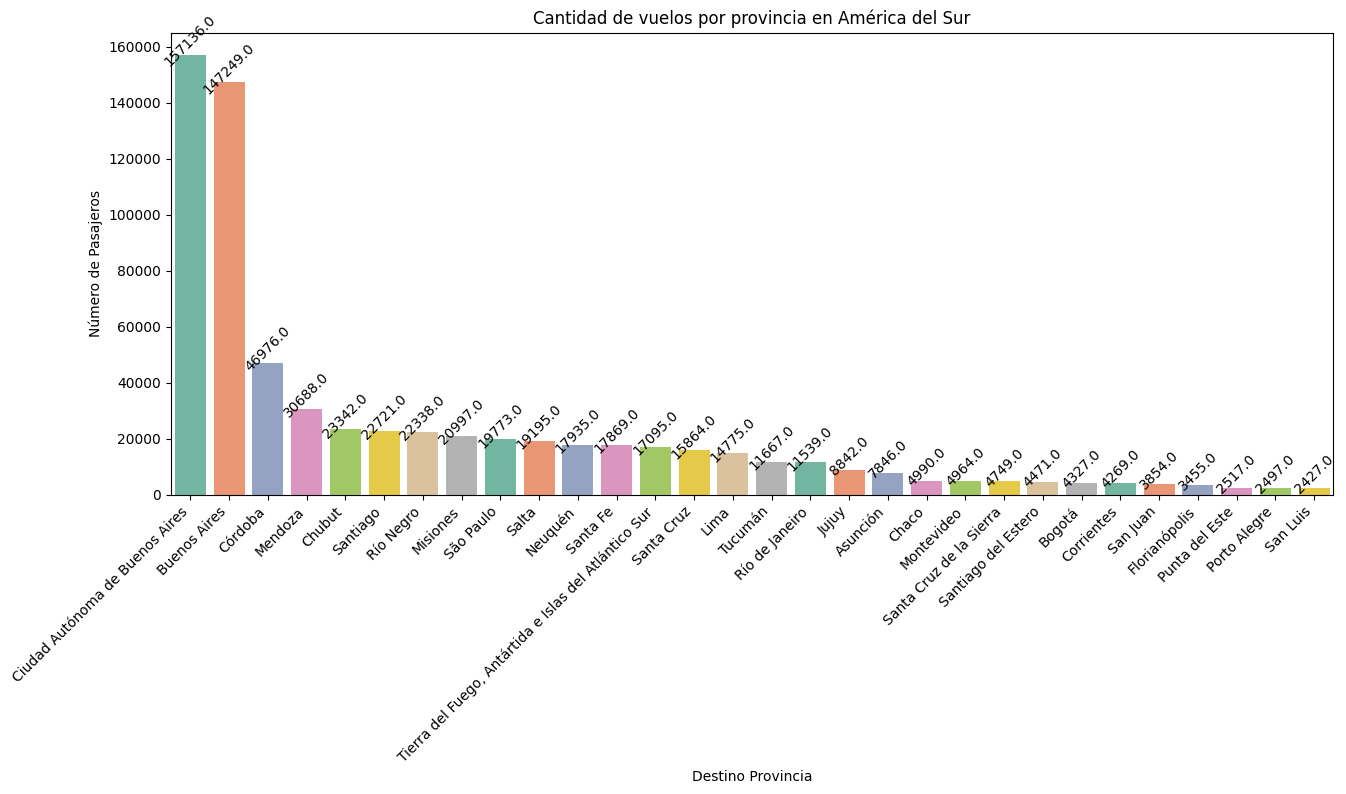

In [63]:
# Filtramos los datos para incluir solo America del Sur
continente_df = 'América del Sur'
df_filt= df[df['destino_continente'] == continente_df]

# Contar la cantidad de vuelos por provincia
conteo_por_provincia = df_filt['destino_provincia'].value_counts().head(30)

# Crear el gráfico
plt.figure(figsize=(15, 6))

# Usamos paleta de colores
ax = sns.countplot(data=df_filt, x='destino_provincia', order=conteo_por_provincia.index, palette='Set2')

# Agregar título y labels de ejes
plt.title(f'Cantidad de vuelos por provincia en {continente_df}')
plt.xlabel('Destino Provincia')
plt.ylabel('Número de Pasajeros')

# Ajustar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45)

# Mostrar el gráfico
plt.show()

<ipython-input-64-8a7a45481e3e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtrado, x='destino_provincia', order=conteo_por_provincia.index, palette='Set3')


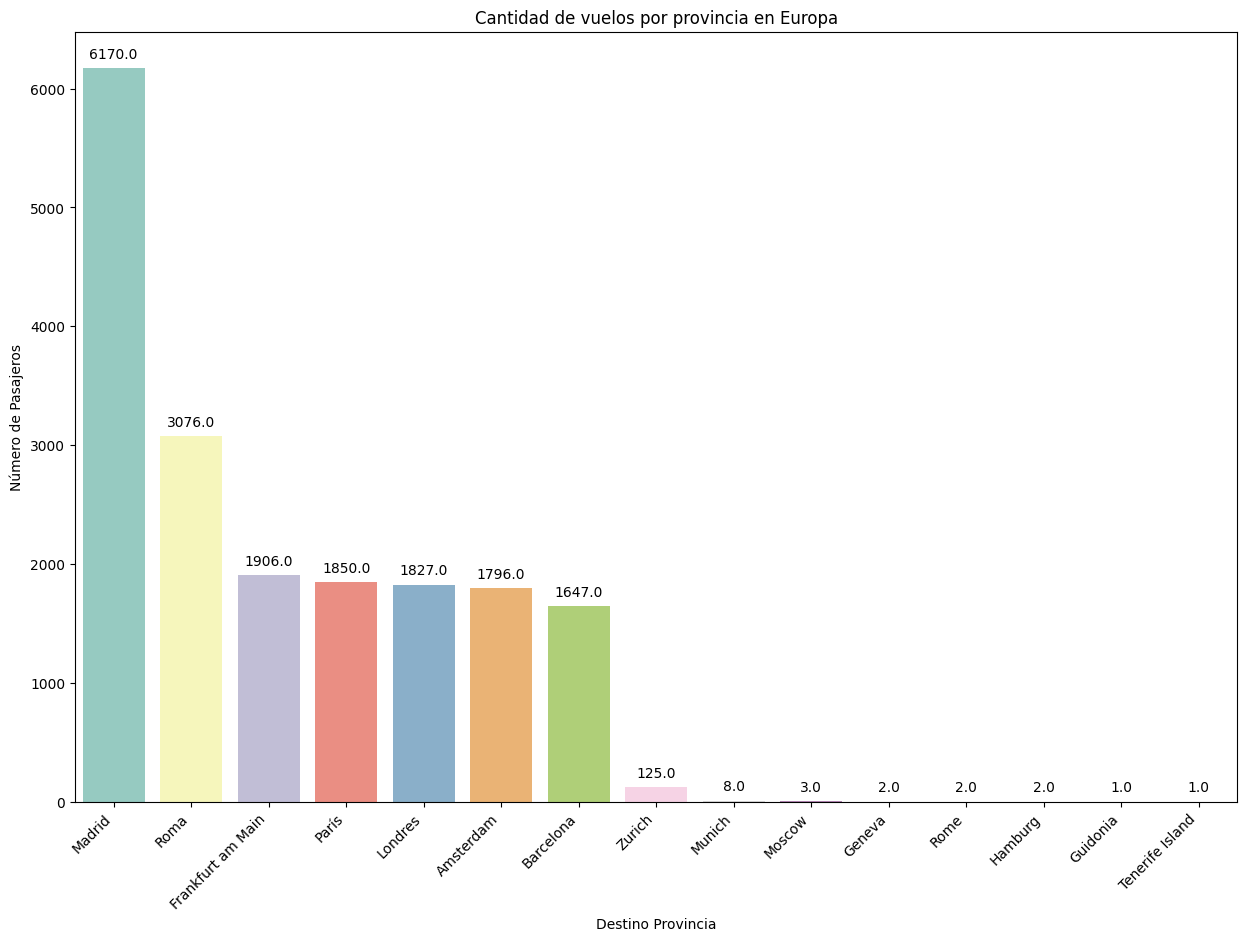

In [64]:
# Filtramos los datos para incluir solo Europa
continente_df = 'Europa'
df_filtrado = df[df['destino_continente'] == continente_df]

# Contar la cantidad de vuelos por provincia
conteo_por_provincia = df_filtrado['destino_provincia'].value_counts().head(15)

# Crear el gráfico
plt.figure(figsize=(15, 10))

# Usamos paleta de colores
ax = sns.countplot(data=df_filtrado, x='destino_provincia', order=conteo_por_provincia.index, palette='Set3')

# Agregar título y labels de ejes
plt.title(f'Cantidad de vuelos por provincia en {continente_df}')
plt.xlabel('Destino Provincia')
plt.ylabel('Número de Pasajeros')

# Ajustar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar el gráfico
plt.show()

<ipython-input-65-9877e3e28ee1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filtrado, x='destino_provincia', order=conteo_por_provincia.index, palette='Set2')


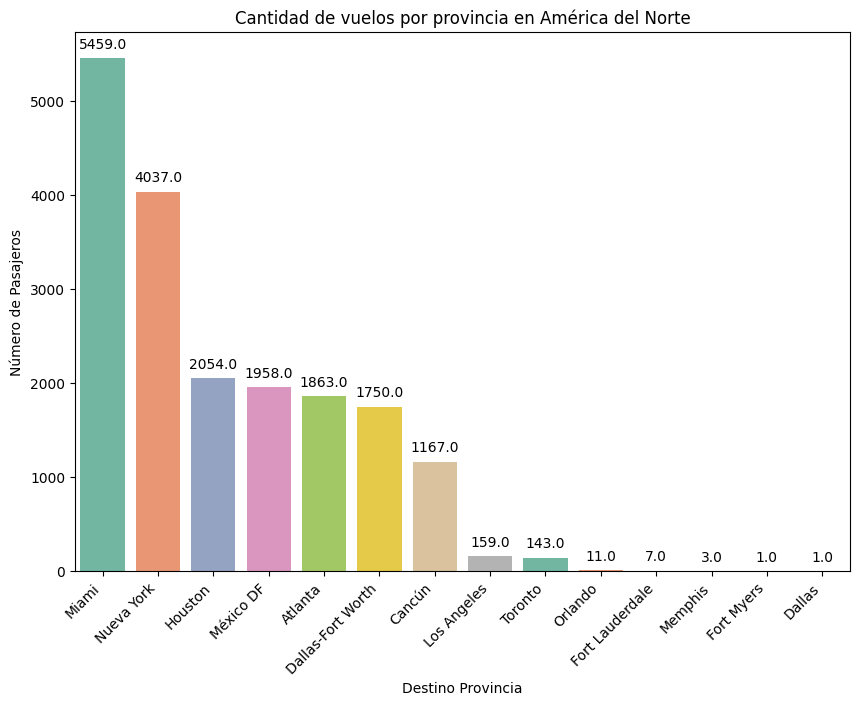

In [65]:
# Filtramos los datos para incluir solo América del Norte
continente_df = 'América del Norte'
df_filtrado = df[df['destino_continente'] == continente_df]

# Contar la cantidad de vuelos por provincia
conteo_por_provincia = df_filtrado['destino_provincia'].value_counts().head(14)

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Usamos paleta de colores
ax = sns.countplot(data=df_filtrado, x='destino_provincia', order=conteo_por_provincia.index, palette='Set2')

# Agregar título y labels de ejes
plt.title(f'Cantidad de vuelos por provincia en {continente_df}')
plt.xlabel('Destino Provincia')
plt.ylabel('Número de Pasajeros')

# Ajustar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Mostrar el gráfico
plt.show()

#ANOVA

In [101]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import numpy as np
# Análisis de vuelos por aerolineas
modelo_aerolinea = ols('vuelos ~ C(aerolinea)', data=df).fit()
anova_aerolinea = sm.stats.anova_lm(modelo_aerolinea, typ=2)
print('ANOVA por aerolinea:')
print(anova_aerolinea)

# Ordenamos aerolineas de mejor a peor según vuelos promedio
vuelo_por_aerolinea = df.groupby('aerolinea')['vuelos'].mean().sort_values()
print('vuelos promedio por aerolinea (ordenadas de mejor a peor):')
print(vuelo_por_aerolinea)


ANOVA por aerolinea:
                     sum_sq        df           F  PR(>F)
C(aerolinea)   49282.292826      51.0  822.518598     0.0
Residual      918170.709502  781535.0         NaN     NaN
vuelos promedio por aerolinea (ordenadas de mejor a peor):
aerolinea
ASL Airlines France                1.000000
Aero Regional Paraguaya            1.000000
TAME                               1.000000
Swiss International Air Lines      1.000000
South African Airways              1.000000
Qantas Airways Limited             1.000000
Icelandair                         1.000000
Edelweiss Air                      1.000000
Eastern Air Lines                  1.000000
Cubana de Aviación                 1.000000
BQB Líneas Aéreas                  1.000000
Estelar Latinoamerica              1.002004
Air New Zealand                    1.003257
KLM                                1.003349
Air Canada                         1.003486
Air Europa                         1.004130
British Airways                 


El valor F alto (822.52) y el valor p extremadamente bajo (0.0) indican que existe una diferencia significativa en el número de vuelos entre las aerolíneas. Esto sugiere que al menos una aerolínea tiene un número de vuelos significativamente diferente de las demás. En este caso, Aerolìneas Argentinas.

In [102]:
 #Construimos intervalos de confianza para vuelos por pais de destino
intervalos_aerolineas = df.groupby('destino_pais').apply(
    lambda x: pd.Series({
        'mean_vuelos': x['vuelos'].mean(),
        'ci_lower': x['vuelos'].mean() - 1.96 * stats.sem(x['vuelos']),
        'ci_upper': x['vuelos'].mean() + 1.96 * stats.sem(x['vuelos'])
    })
).sort_values(by='mean_vuelos')
vuelo_por_aerolinea = df.groupby('destino_pais')['vuelos'].mean().sort_values()
print('ANOVA por destino:')
print(anova_aerolinea)
print('Intervalos de confianza para vuelos por destino pais:')
print(intervalos_aerolineas)

ANOVA por destino:
                     sum_sq        df           F  PR(>F)
C(aerolinea)   49282.292826      51.0  822.518598     0.0
Residual      918170.709502  781535.0         NaN     NaN
Intervalos de confianza para vuelos por destino pais:
                                                 mean_vuelos  ci_lower  \
destino_pais                                                             
Malta                                               1.000000       NaN   
Suiza                                               1.000000  1.000000   
Aruba                                               1.000000       NaN   
Australia                                           1.000000  1.000000   
Sudáfrica                                           1.000000  1.000000   
Rusia                                               1.000000  1.000000   
Cabo Verde                                          1.000000       NaN   
Canadá                                              1.000000  1.000000   
Chipre       

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Los intervalos de confianza (ci_lower y ci_upper) indican el rango dentro del cual se espera que esté el número promedio de vuelos para cada país destino, con un nivel de confianza del 95%. Por ejemplo, para Uruguay, se estima que el número promedio de vuelos está entre aproximadamente 1.765 y 1.812.

# **Feature Engineering**

**Lags y Rolling Windows**

Se agregan para obtener información más detallada y precisa sobre el comportamiento de las series temporales.

In [105]:
# Función para calcular lags y rolling windows
def calcular_lags_y_rollings(df, columnas, windows):
    # Crear una lista para almacenar los DataFrames de lags y rolling windows
    df_list = []

    for columna in columnas:
        for window in windows:
            df_lag = df.groupby('aerolinea')[columna].shift(window).rename(f'{columna}_lag_{window}')
            df_rolling = df.groupby('aerolinea')[columna].shift().rolling(window=window, min_periods=1).mean().reset_index(0, drop=True).rename(f'{columna}_rolling_{window}')
            df_list.append(df_lag)
            df_list.append(df_rolling)

    # Concatenar todos los DataFrames en la lista con el DataFrame original
    df_lags_rolling = pd.concat(df_list, axis=1)
    df = pd.concat([df, df_lags_rolling], axis=1)

    # Reemplazar NaN con 0
    df.fillna(0, inplace=True)

    return df

# Columnas numéricas para calcular lags y rolling windows
columnas_metricas = ['pasajeros', 'asientos', 'vuelos', 'COP', 'PROMAS','DayOfWeek']

# Ventanas para Lags y rolling mean
windows = [1, 2, 3, 5, 7, 14, 30]

# Calcular lags y rolling windows
df = calcular_lags_y_rollings(df, columnas_metricas, windows)

# Verificar los cambios
print('DataFrame con lags y rolling windows:')
print(df.head())

DataFrame con lags y rolling windows:
       fecha clasificacion_vuelo clase_vuelo              aerolinea  \
0 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
1 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
2 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
3 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
4 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   

                           origen_aeropuerto         origen_localidad  \
0                  Aeropuerto de Sauce Viejo                 Santa Fe   
1    Aeropuerto Int. Martín Miguel de Güemes                    Salta   
2       Aeropuerto Int. Tte. Luis Candelaria  San Carlos de Bariloche   
3  Aeropuerto Int. de Rosario Islas Malvinas                  Rosario   
4  Aeropuerto Int. de Rosario Islas Malvinas                  Rosario   

  origen_provincia origen_pais origen_continente  \
0         Santa Fe   Argentina   América del

In [114]:
df.head()


fecha clasificacion_vuelo clase_vuelo              aerolinea  \
8  2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
9  2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
10 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
14 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
15 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   

                   origen_provincia origen_pais destino_provincia  \
8   Ciudad Autónoma de Buenos Aires   Argentina           Tucumán   
9   Ciudad Autónoma de Buenos Aires   Argentina             Chaco   
10  Ciudad Autónoma de Buenos Aires   Argentina          Misiones   
14  Ciudad Autónoma de Buenos Aires   Argentina            Chubut   
15  Ciudad Autónoma de Buenos Aires   Argentina        Santa Cruz   

   destino_pais  pasajeros  asientos  ...  DayOfWeek_lag_3  \
8     Argentina        159       298  ...              6.0   
9     Argentina         73       128  ...              6.0   
10    Argentina        770       978  ...              6.0   
14    Argentina        101       137  ...              6.0   
15    Argentina        509       596  ...              6.0   

    DayOfWeek_rolling_3  DayOfWeek_lag_5  DayOfWeek_rolling_5  \
8                   6.0              6.0                  6.0   
9                   6.0              6.0                  6.0   
10                  6.0              6.0                  6.0   
14                  6.0              6.0                  6.0   
15                  6.0              6.0                  6.0   

    DayOfWeek_lag_7 DayOfWeek_rolling_7  DayOfWeek_lag_14  \
8               0.0                 6.0               0.0   
9               0.0                 6.0               0.0   
10              6.0                 6.0               0.0   
14              6.0                 6.0               0.0   
15              6.0                 6.0               0.0   

    DayOfWeek_rolling_14  DayOfWeek_lag_30  DayOfWeek_rolling_30  
8                    6.0               0.0                   6.0  
9                    6.0               0.0                   6.0  
10                   6.0               0.0                   6.0  
14                   6.0               0.0                   6.0  
15                   6.0               0.0                   6.0  

[5 rows x 103 columns]

El DataFrame resultante tiene muchas columnas debido a la adición de las columnas de lags y rolling windows para múltiples variables numéricas y diferentes ventanas de tiempo. Esto hizo que el DataFrame sea difícil de manejar y visualizar de manera efectiva, ademàs de demorar mucho los procesamientos. Se decidió acotar los datos para trabajar con un subconjunto más manejable de datos, sin perder de vista la información crítica derivada de los lags y rolling windows.

In [115]:
# Columnas a dropear
columnas_a_dropear = ['origen_continente', 'destino_continente', 'origen_aeropuerto','destino_aeropuerto','destino_localidad','origen_localidad']

# Dropear las columnas del DataFrame
df = df.drop(columns=columnas_a_dropear)

KeyError: "['origen_continente', 'destino_continente', 'origen_aeropuerto', 'destino_aeropuerto', 'destino_localidad', 'origen_localidad'] not found in axis"

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781587 entries, 0 to 781586
Columns: 103 entries, fecha to DayOfWeek_rolling_30
dtypes: datetime64[ns](1), float64(86), int32(4), int64(4), object(7), period[M](1)
memory usage: 602.3+ MB


#Polynomial Features

In [111]:
# Seleccionar solo las columnas de tipo float, excluyendo 'vuelos'
columnas_numericas = df.select_dtypes(include=['int64']).columns
columnas_numericas = [col for col in columnas_numericas if col != 'vuelos']

# Aplicar PolynomialFeatures de segundo grado
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[columnas_numericas])

# Crear un DataFrame con los nuevos features polinomiales
poly_feature_names = poly.get_feature_names_out(columnas_numericas)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combinar el DataFrame polinomial con el DataFrame original
df_final = pd.concat([df.reset_index(drop=True), df_poly.reset_index(drop=True)], axis=1)

# Eliminar columnas con nombres duplicados
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

# Eliminar columnas con exactamente los mismos valores
df_final = df_final.loc[:, (df_final != df_final.iloc[0]).any()]

# Verificar los cambios
print('DataFrame con features polinomiales:')
print(df_final.head())

DataFrame con features polinomiales:
       fecha clasificacion_vuelo clase_vuelo              aerolinea  \
0 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
1 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
2 2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
3 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
4 2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   

  origen_provincia origen_pais destino_provincia destino_pais  pasajeros  \
0         Santa Fe   Argentina         Río Negro    Argentina         85   
1            Salta   Argentina             Jujuy    Argentina         23   
2        Río Negro   Argentina          Santa Fe    Argentina         78   
3         Santa Fe   Argentina           Córdoba    Argentina         48   
4         Santa Fe   Argentina      Buenos Aires    Argentina         90   

   asientos  ...  DayOfWeek_lag_14  DayOfWeek_rolling_14  DayOfWeek_lag_30  \
0

Con el fin de atrapar relaciones que quizas no sean del tipo lineal, generaremos variables nuevas con polynomial features. Esto generará una gran cantidad de variables que posteriormente evaluaremos con algún método para quedarnos con las mejores.

#Detección de Outliers

In [112]:
from sklearn.ensemble import IsolationForest

Se usa un método que combina IQR, z-score, e Isolation Forest. Si una fila es marcada por los 3 métodos, entonces la removeremos. Con ello, solamente estaremos removiendo filas realmente "extrañas", y asegurándonos de mantener la mayor cantidad de datos posibles.

In [113]:
# Función para detectar outliers utilizando IQR, z-score e IsolationForest
def detectar_outliers(df):
    outliers = pd.DataFrame(index=df.index)

    # IQR
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers['IQR'] = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).astype(int).sum(axis=1)
    outliers['IQR'] = outliers['IQR'].apply(lambda x: 1 if x > 0 else 0)

    # z-score
    z_scores = np.abs(stats.zscore(df))
    outliers['z_score'] = (z_scores > 3).astype(int).sum(axis=1)
    outliers['z_score'] = outliers['z_score'].apply(lambda x: 1 if x > 0 else 0)

    # IsolationForest
    iso_forest = IsolationForest(contamination=0.05, random_state=49150)
    outliers['IsolationForest'] = iso_forest.fit_predict(df)
    outliers['IsolationForest'] = outliers['IsolationForest'].apply(lambda x: 1 if x == -1 else 0)

    # Considerar un valor como outlier solo si los tres métodos lo marcan como tal
    outliers['final'] = (outliers[['IQR', 'z_score', 'IsolationForest']] == 1).sum(axis=1)

    return outliers

# Aplicar detección de outliers
outliers = detectar_outliers(df.select_dtypes(include=['int64', 'float64']))
outliers = outliers[outliers['final'] == 3]
df = df.drop(outliers.index)

# Verificar los cambios
print('Número de filas eliminadas por ser outliers:', len(outliers))
print('Número de filas restantes:', len(df))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Número de filas eliminadas por ser outliers: 37219
Número de filas restantes: 744368


# Selección de variables

Teniendo en cuenta la gran cantidad de variables que hemos generado, implementaremos algunos pasos de selección para ayudar a reducir el número y quedarnos solamente con aquellas que aporten valor, a traves del feature importance.
Para ello, lo primero que haremos es entrenar un LightGBM, dejándolo que vaya hasta la máxima profundidad (max_depth=-1), y utilizaremos su salida quedarnos con las mejores variables.
En cuanto a la división de datos en training y testing, es importante mantener los conjuntos que sean contiguos (sin fechas mezcladas). Por la cantidad de datos que tenemos, es razonable establecer un corte en 2023-12-31.

In [116]:
# Dividimos los datos en conjuntos de entrenamiento y prueba manteniendo el orden temporal
train_end_date = '2023-12-31'  # Fecha final
train_data = df_final[df_final['fecha'] <= train_end_date]
test_data = df_final[df_final['fecha'] > train_end_date]

In [117]:
# Separamos características y target
X_train = train_data.drop(columns=['fecha', 'vuelos'])
y_train = train_data['vuelos']
X_test = test_data.drop(columns=['fecha', 'vuelos'])
y_test = test_data['vuelos']

# Escalado y Encoding de variables

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [119]:
# Identificar columnas categóricas y numéricas
categorical_features = ['clasificacion_vuelo', 'clase_vuelo']
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear preprocesador con OneHotEncoder para columnas categóricas y StandardScaler para columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Convert the transformed data back to DataFrames for better inspection (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=preprocessor.get_feature_names_out())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=preprocessor.get_feature_names_out())

Primera reducción

Entrenamos un LightGBM con parámetros fijos para reducir una primera cantidad de variables.

In [120]:
from lightgbm import LGBMRegressor

In [121]:
# Entrenar un modelo LightGBM
lgb_model = LGBMRegressor(
    random_state=2407,
    n_estimators=100,  # Número de árboles
    max_depth=-1,      # Profundidad máxima de los árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    min_child_samples=20  # Número mínimo de muestras en una hoja
)
lgb_model.fit(X_train_scaled, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17042
[LightGBM] [Info] Number of data points in the train set: 739775, number of used features: 97
[LightGBM] [Info] Start training from score 1.577347


LGBMRegressor(random_state=2407)

Partiendo de 740000 variables, puede ser adecuado quedarnos con 70000 en esta primera selección, y en línea con buenas prácticas (aprox 10%). Las variables de pasajeros, aerolinea, y destino_pais deberían encontrarse de forma obligatoria entre las 70000, y de no ser así, las agregaremos.



In [123]:
# Obtenemos los nombres de las características numéricas
numeric_feature_names = preprocessor.transformers_[0][2]

# Creamos un DataFrame para almacenar la importancia de las características
importancia_vars = pd.DataFrame({
    'feature': numeric_feature_names,
    'importance': lgb_model.feature_importances_[:len(numeric_feature_names)]
}).sort_values(by='importance', ascending=False)

# Seleccionamos las principales características en función de la importancia
top_n = 7000
top_features = importancia_vars.head(top_n)['feature'].tolist()

# Añadimos manualmente las características requeridas si no están ya incluidas
required_features = ['pasajeros', 'aerolinea', 'destino_pais']
for feature in required_features:
    if feature not in top_features:
        top_features.append(feature)

# Imprimir las principales características incluyendo las obligatorias
print('Top features including required features:')
print(top_features)

Top features including required features:
['PROMAS', 'asientos', 'asientos clase_vuelo_num', 'asientos^2', 'pasajeros asientos', 'COP_lag_3', 'PROMAS_lag_2', 'pasajeros', 'pasajeros clase_vuelo_num', 'COP', 'PROMAS_lag_1', 'vuelos_lag_1', 'PROMAS_rolling_5', 'pasajeros_lag_3', 'PROMAS_rolling_30', 'COP_rolling_14', 'COP_lag_7', 'pasajeros_lag_30', 'asientos_rolling_5', 'asientos_rolling_2', 'asientos_lag_2', 'COP_lag_1', 'pasajeros_lag_1', 'pasajeros_rolling_2', 'pasajeros_lag_7', 'PROMAS_rolling_14', 'COP_lag_30', 'pasajeros_lag_2', 'asientos_lag_14', 'PROMAS_rolling_7', 'PROMAS_lag_7', 'pasajeros_rolling_3', 'PROMAS_lag_5', 'pasajeros_lag_5', 'COP_lag_5', 'COP_rolling_2', 'asientos_lag_7', 'asientos_rolling_30', 'COP_rolling_30', 'asientos_rolling_3', 'PROMAS_rolling_2', 'DayOfWeek_rolling_30', 'asientos_lag_5', 'PROMAS_lag_14', 'COP_lag_2', 'pasajeros_rolling_14', 'PROMAS_lag_3', 'PROMAS_rolling_3', 'COP_lag_14', 'COP_rolling_7', 'PROMAS_lag_30', 'pasajeros^2', 'clase_vuelo_num', 'a

Vamos a realizar exactamente el mismo proceso, con un LightGBM con exactamente los mismos parámetros, pero además agregaremos un 20% de variables nuevas aleatorias (canaritos) para tener un punto de comparación. Luego, nos quedaremos con variables que se encuentren por encima de la "capa geológica" de los canaritos.

In [124]:
# Filtramos
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Identificamod columnas categóricas y numéricas
categorical_features = ['aerolinea', 'destino_pais']
numeric_features = X_train_top.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creamos preprocesador con OneHotEncoder para columnas categóricas y StandardScaler para columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Fit and transform the training data
X_train_top_scaled = preprocessor.fit_transform(X_train_top)
X_test_top_scaled = preprocessor.transform(X_test_top)

# Convert the transformed data back to DataFrames for better inspection (optional)
X_train_top_scaled = pd.DataFrame(X_train_top_scaled, columns=preprocessor.get_feature_names_out())
X_test_top_scaled = pd.DataFrame(X_test_top_scaled, columns=preprocessor.get_feature_names_out())

In [125]:
# Añadimos variables aleatorias (canaritos) para entrenar el modelo refinado
num_random_vars = int(0.2 * len(top_features))
canaritos_train = np.random.rand(X_train_top_scaled.shape[0], num_random_vars)
canaritos_test = np.random.rand(X_test_top_scaled.shape[0], num_random_vars)

# Crear nombres para las columnas canaritos
canarito_columns = [f'canarito_{i}' for i in range(num_random_vars)]

# Concatenar los canaritos con los datos filtrados
X_train_top_scaled = pd.concat([X_train_top_scaled, pd.DataFrame(canaritos_train, columns=canarito_columns, index=X_train_top_scaled.index)], axis=1)
X_test_top_scaled = pd.concat([X_test_top_scaled, pd.DataFrame(canaritos_test, columns=canarito_columns, index=X_test_top_scaled.index)], axis=1)

In [127]:
# Entrenar un modelo LightGBM con las características filtradas y los canaritos
lgb_model_final = LGBMRegressor(
    random_state=2407,
    n_estimators=100,  # Número de árboles
    max_depth=-1,      # Profundidad máxima de los árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    min_child_samples=20  # Número mínimo de muestras en una hoja
)
lgb_model_final.fit(X_train_top_scaled, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.382761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22019
[LightGBM] [Info] Number of data points in the train set: 739775, number of used features: 182
[LightGBM] [Info] Start training from score 1.577347


LGBMRegressor(random_state=2407)

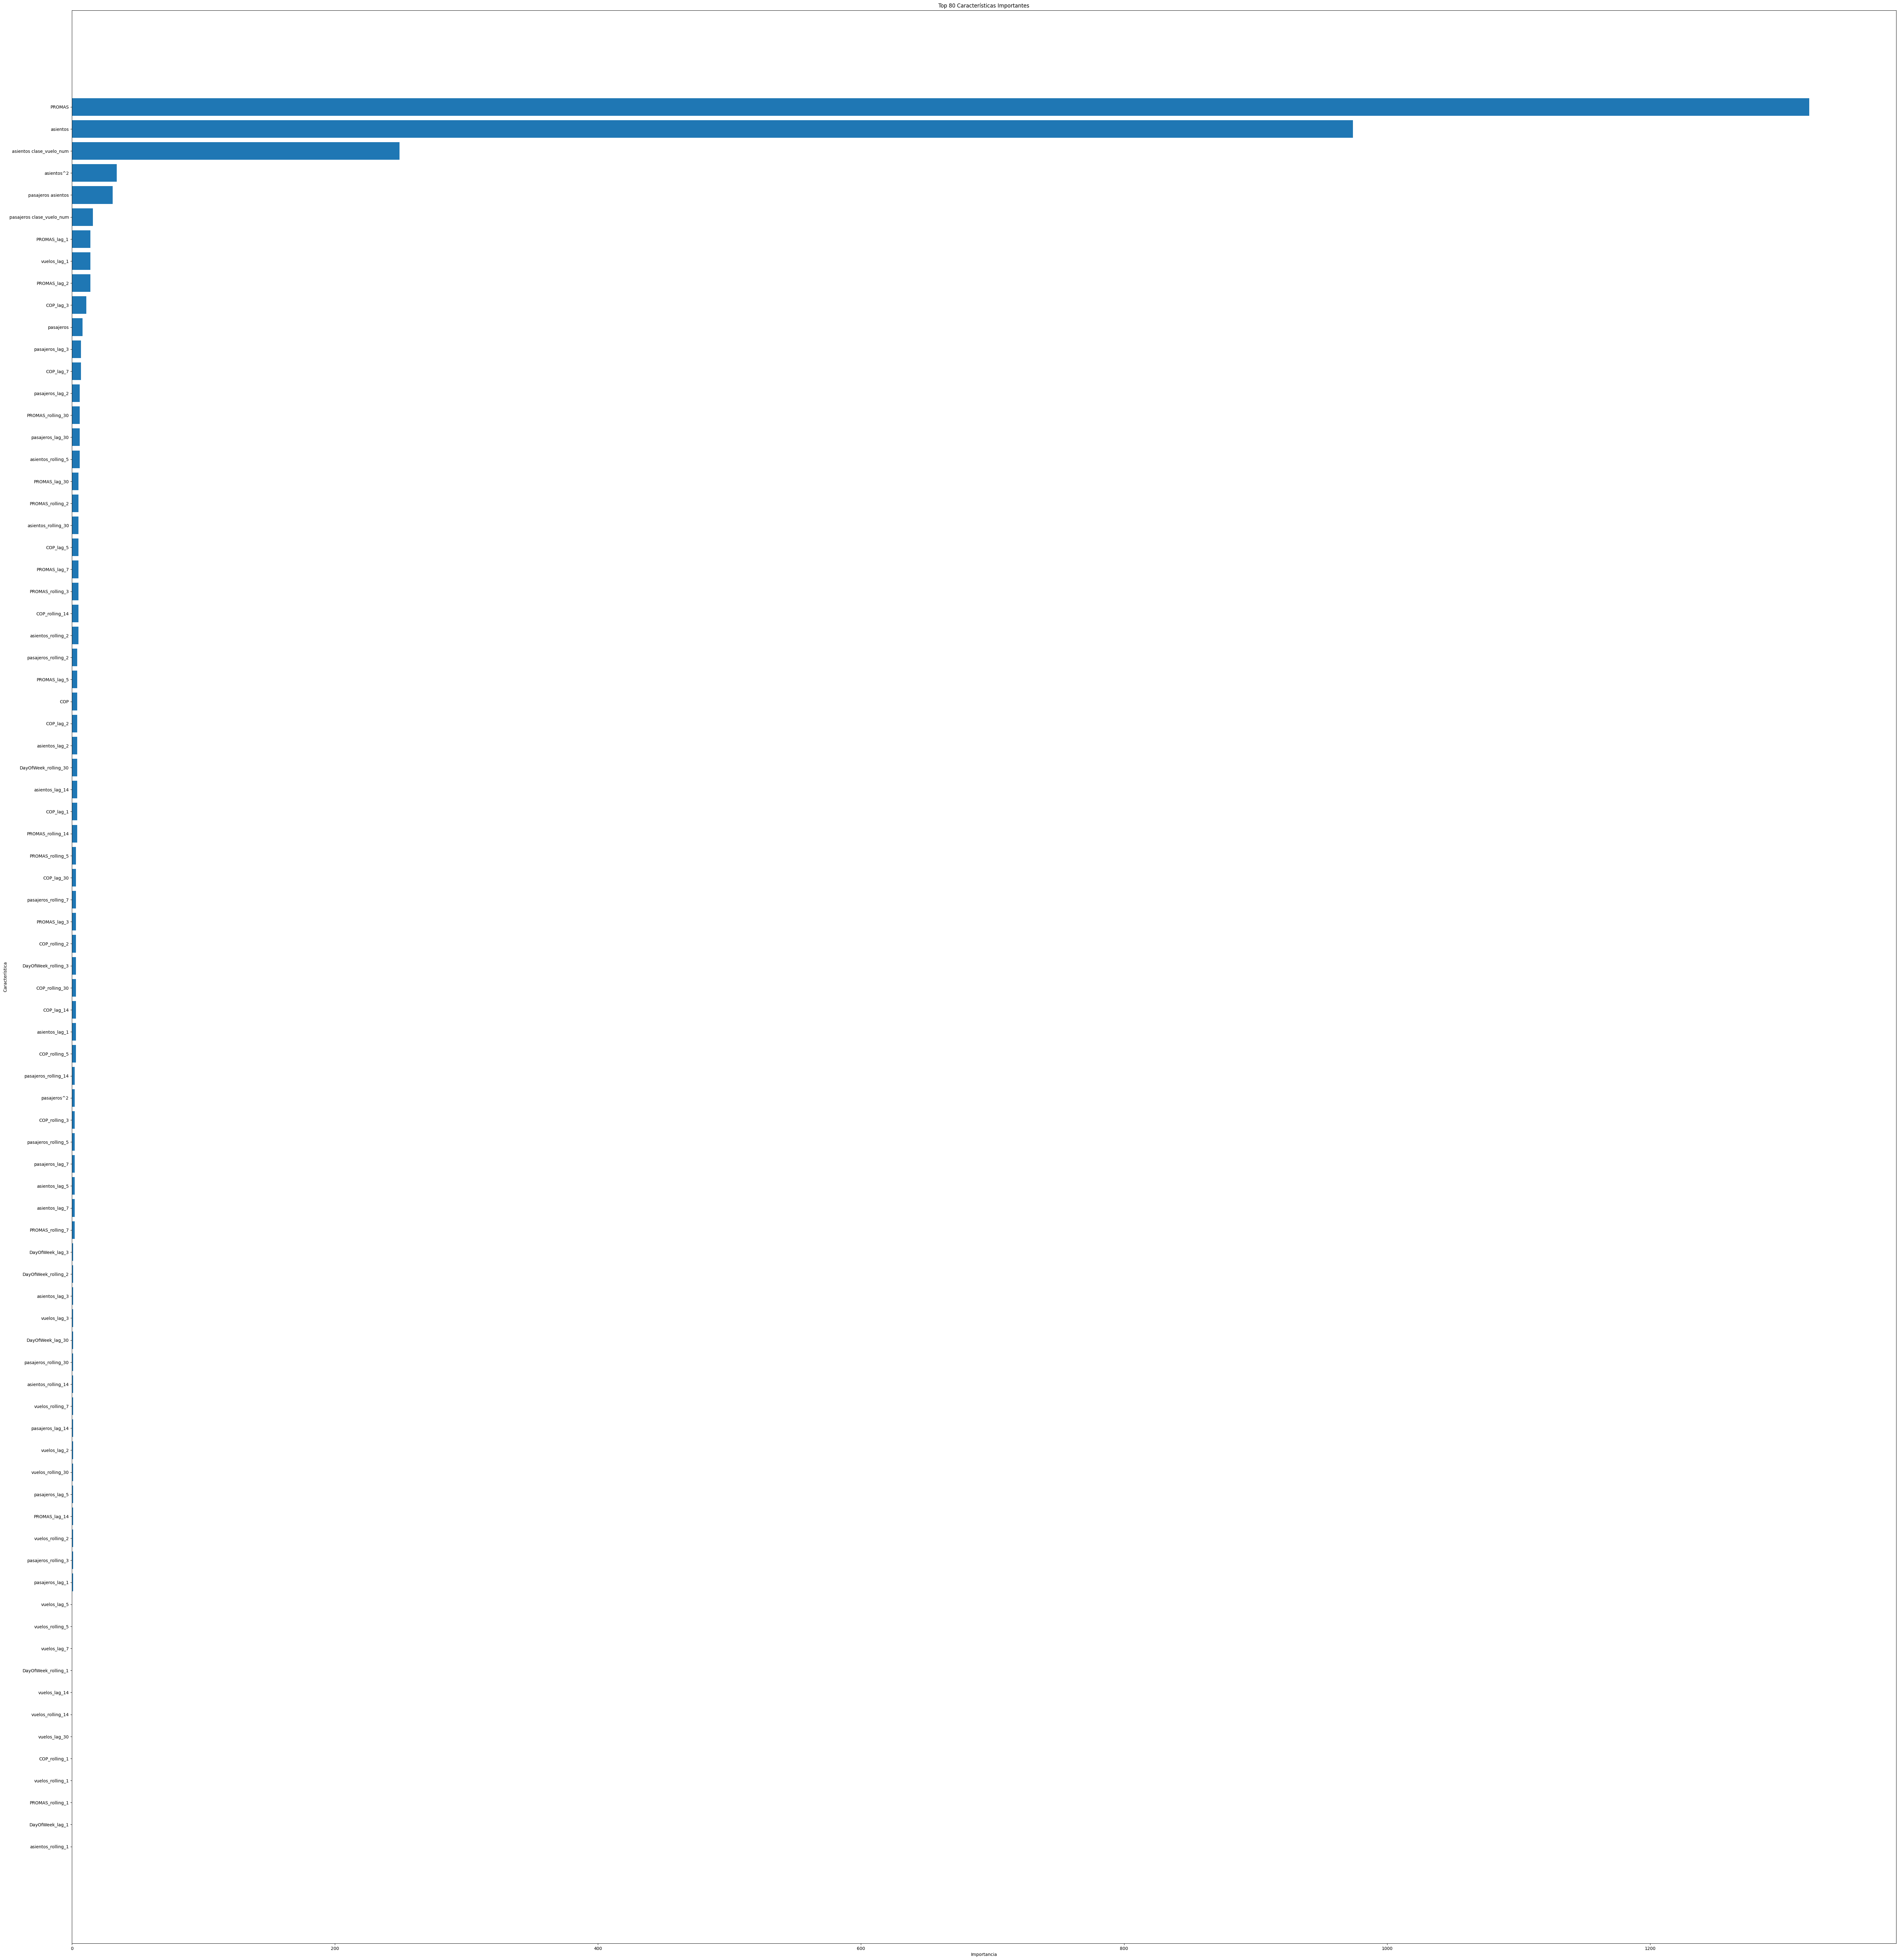

Importancia de las variables finales:
['PROMAS', 'asientos', 'asientos clase_vuelo_num', 'asientos^2', 'pasajeros asientos', 'pasajeros clase_vuelo_num', 'PROMAS_lag_1', 'vuelos_lag_1', 'PROMAS_lag_2', 'COP_lag_3', 'pasajeros', 'pasajeros_lag_3', 'COP_lag_7', 'pasajeros_lag_2', 'PROMAS_rolling_30', 'pasajeros_lag_30', 'asientos_rolling_5', 'PROMAS_lag_30', 'PROMAS_rolling_2', 'asientos_rolling_30', 'COP_lag_5', 'PROMAS_lag_7', 'PROMAS_rolling_3', 'COP_rolling_14', 'asientos_rolling_2', 'pasajeros_rolling_2', 'PROMAS_lag_5', 'COP', 'COP_lag_2', 'asientos_lag_2', 'DayOfWeek_rolling_30', 'asientos_lag_14', 'COP_lag_1', 'PROMAS_rolling_14', 'PROMAS_rolling_5', 'COP_lag_30', 'pasajeros_rolling_7', 'PROMAS_lag_3', 'COP_rolling_2', 'DayOfWeek_rolling_3', 'COP_rolling_30', 'COP_lag_14', 'asientos_lag_1', 'COP_rolling_5', 'pasajeros_rolling_14', 'pasajeros^2', 'COP_rolling_3', 'pasajeros_rolling_5', 'pasajeros_lag_7', 'asientos_lag_5', 'asientos_lag_7', 'PROMAS_rolling_7', 'DayOfWeek_lag_3', 'D

In [128]:
# Getting the numeric feature names
numeric_feature_names = preprocessor.transformers_[0][2]

# Creating a DataFrame to store feature importances
importancia_vars_final = pd.DataFrame({
    'feature': numeric_feature_names,
    'importance': lgb_model_final.feature_importances_[:len(numeric_feature_names)]
}).sort_values(by='importance', ascending=False)

# Graficar las 100 características más importantes
top_n = 80
plt.figure(figsize=(75, 80))
plt.barh(importancia_vars_final.head(top_n)['feature'][::-1], importancia_vars_final.head(top_n)['importance'][::-1])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title(f'Top {top_n} Características Importantes')
plt.show()

# Seleccionar las características más importantes ajustando el número basándose en la visualización
num_selected_features = 80
top_final_features = importancia_vars_final.head(num_selected_features)['feature'].tolist()

# Manually add required features if they are not already included
required_features = ['pasajeros', 'aerolinea', 'destino_pais']
for feature in required_features:
    if feature not in top_final_features:
        top_final_features.append(feature)

# Verificar las variables importantes finales
print('Importancia de las variables finales:')
print(top_final_features)

In [129]:
# Filtramos el conjunto de entrenamiento y prueba para incluir solo las características finales más importantes
X_train_final = X_train[top_final_features]
X_test_final = X_test[top_final_features]

# Identificamos columnas categóricas y numéricas
categorical_features = ['aerolinea', 'destino_pais']
numeric_features = X_train_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creamos preprocesador con OneHotEncoder para columnas categóricas y StandardScaler para columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Fit and transform the training data
X_train_final_scaled = preprocessor.fit_transform(X_train_final)
X_test_final_scaled = preprocessor.transform(X_test_final)

# Convert the transformed data back to DataFrames for better inspection (optional)
X_train_final_scaled = pd.DataFrame(X_train_final_scaled, columns=preprocessor.get_feature_names_out())
X_test_final_scaled = pd.DataFrame(X_test_final_scaled, columns=preprocessor.get_feature_names_out())

In [130]:
# Definimos directorio para guardar los mejores hiperparámetros
directory = '/content/gdrive/MyDrive/CODER-NINFA PEDANO'

# Función para guardar los mejores hiperparámetros en un archivo JSON
def save_best_params(search, filename):
    best_params = search.best_params_
    with open(os.path.join(directory, filename), 'w') as file:
        json.dump(best_params, file)

# Definir un DataFrame para almacenar las métricas de error
metrics_df = pd.DataFrame()

#SELECCIÓN DE MODELOS

# XGBoost

In [131]:
!pip install xgboost

In [132]:
df_final.pasajeros=df_final.pasajeros.astype(int)
df_final.vuelos=df_final.vuelos.astype(int)
df_final=df_final

In [133]:
import xgboost as xg


In [135]:
# Crear el modelo XGBoost
xgb_model = XGBRegressor(
    random_state=2407,
    n_estimators=100,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=3  # Profundidad máxima de los árboles
)

# Entrenar el modelo
xgb_model.fit(X_train_final_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = xgb_model.predict(X_test_final_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.010526472062124415
Error absoluto medio (MAE): 0.025070469573070294
Coeficiente de determinación (R^2): 0.993770031527681


In [136]:
try:
    metrics_df
except NameError:
    metrics_df = pd.DataFrame(columns=['Model', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE', 'Train R2', 'Test R2'])

# Predicción para el conjunto de entrenamiento (opcional, si necesitas comparar con el entrenamiento)
y_pred_train = xgb_model.predict(X_train_final_scaled)

# Calcular métricas y agregar al DataFrame
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['XGBoost'],
    'Train RMSE': [np.sqrt(mean_squared_error(y_train, y_pred_train))],
    'Test RMSE': [np.sqrt(mean_squared_error(y_test, y_pred))],
    'Train MAE': [mean_absolute_error(y_train, y_pred_train)],
    'Test MAE': [mean_absolute_error(y_test, y_pred)],
    'Train R2': [r2_score(y_train, y_pred_train)],
    'Test R2': [r2_score(y_test, y_pred)]
})], ignore_index=True)

#REGRESIÓN LINEAL


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [144]:
# Entrenar la regresión lineal múltiple directamente
linear_model = LinearRegression()
linear_model.fit(X_train_final_scaled, y_train)

# Predicción y métricas para la regresión lineal múltiple
y_pred_linear_train = linear_model.predict(X_train_final_scaled)
y_pred_linear_test = linear_model.predict(X_test_final_scaled)
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Linear'],
    'Train RMSE': [np.sqrt(mean_squared_error(y_train, y_pred_linear_train))],
    'Test RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_linear_test))],
    'Train MAE': [mean_absolute_error(y_train, y_pred_linear_train)],
    'Test MAE': [mean_absolute_error(y_test, y_pred_linear_test)],
    'Train R2': [r2_score(y_train, y_pred_linear_train)],
    'Test R2': [r2_score(y_test, y_pred_linear_test)]
})])
print(metrics_df)

     Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R2   Test R2
0  XGBoost    0.067580   0.102599   0.018708   0.02507  0.996230  0.993770
0   Linear    0.209496   0.268103   0.134077   0.15449  0.963775  0.957459
0   Linear    0.209496   0.268103   0.134077   0.15449  0.963775  0.957459


In [143]:
!pip install scikit-optimize catboost lightgbm tensorflow keras-tuner mlflow pynvml pmdarima > /dev/null 2>&1
from skopt import BayesSearchCV
from sklearn.svm import SVR

# LGBM

In [146]:
import os
import json
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import StackingRegressor

In [147]:
# Definir la función save_best_params
def save_best_params(search, filename):
    best_params = search.best_params_
    with open(filename, 'w') as file:
        json.dump(best_params, file)
    print(f"Hiperparámetros guardados en: {os.path.abspath(filename)}")  # Imprimir la ruta completa

# Ruta para guardar y cargar los mejores hiperparámetros
file_path = '/content/gdrive/MyDrive/CODER-NINFA PEDANO/pre entrega final/best_params_lgbm.json'

# Optimizamos y entrenamos el modelo LightGBM
lgb_search = BayesSearchCV(
    estimator=LGBMRegressor(random_state=49150, verbose=-1),
    search_spaces={
        'n_estimators': (50, 500),
        'max_depth': (3, 10),
        'learning_rate': (0.01, 0.03, 'log-uniform'),
        'min_child_samples': (10, 100)
    },
    n_iter=100,
    cv=None,
    random_state=2407,
    scoring='neg_mean_squared_error'
)

lgb_search.fit(X_train_final_scaled, y_train)
best_lgb_model = lgb_search.best_estimator_

# Guardar los mejores hiperparámetros del modelo LightGBM
save_best_params(lgb_search, file_path)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(file_path):
    print(f"El archivo existe en la ruta especificada: {file_path}")

    # Cargar los mejores hiperparámetros para LightGBM
    with open(file_path, 'r') as f:
        best_params_lgbm = json.load(f)

    # Entrenar el modelo LightGBM con los mejores hiperparámetros
    best_lgb_model = LGBMRegressor(random_state=49150, verbose=-1, **best_params_lgbm)
    best_lgb_model.fit(X_train_final_scaled, y_train)

    # Predicción y métricas para LightGBM
    y_pred_lgb_train = best_lgb_model.predict(X_train_final_scaled)
    y_pred_lgb_test = best_lgb_model.predict(X_test_final_scaled)

    # Inicializamos metrics_df si no está definido
    if 'metrics_df' not in globals():
        metrics_df = pd.DataFrame()

    # Agregar las métricas al DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({
        'Model': ['LGBM'],
        'Train RMSE': [np.sqrt(mean_squared_error(y_train, y_pred_lgb_train))],
        'Test RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lgb_test))],
        'Train MAE': [mean_absolute_error(y_train, y_pred_lgb_train)],
        'Test MAE': [mean_absolute_error(y_test, y_pred_lgb_test)],
        'Train R2': [r2_score(y_train, y_pred_lgb_train)],
        'Test R2': [r2_score(y_test, y_pred_lgb_test)]
    })])

    print("Métricas calculadas y agregadas al DataFrame.")
else:
    print(f"El archivo NO existe en la ruta especificada: {file_path}")

Hiperparámetros guardados en: /content/gdrive/MyDrive/CODER-NINFA PEDANO/pre entrega final/best_params_lgbm.json
El archivo existe en la ruta especificada: /content/gdrive/MyDrive/CODER-NINFA PEDANO/pre entrega final/best_params_lgbm.json
Métricas calculadas y agregadas al DataFrame.


In [148]:
# Imprimir las métricas de rendimiento
print(metrics_df)

     Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R2   Test R2
0  XGBoost    0.067580   0.102599   0.018708  0.025070  0.996230  0.993770
0   Linear    0.209496   0.268103   0.134077  0.154490  0.963775  0.957459
0   Linear    0.209496   0.268103   0.134077  0.154490  0.963775  0.957459
0     LGBM    0.009773   0.021846   0.001193  0.002308  0.999921  0.999718


El modelo de regresión lineal tiene un rendimiento decente, con un R2 alto tanto en el conjunto de entrenamiento como en el de prueba, indicando que el modelo explica bien la variabilidad de los datos.
Sin embargo, tiene errores más altos (RMSE y MAE) en comparación con los modelos XGBoost y LGBM.
El modelo LGBM tiene el mejor rendimiento entre todos los modelos evaluados.
Los errores (RMSE y MAE) son los más bajos, tanto en el conjunto de entrenamiento como en el de prueba, indicando una alta precisión.
El R2 es muy alto, casi perfecto, indicando que el modelo LGBM explica casi toda la variabilidad de los datos.



In [ ]:
from sklearn.ensemble import StackingRegressor

#STACKING

Combinamos las predicciones de los 3 modelos base para producir una predicción final intentando que sea mas precisa y robusta que las predicciones individuales de cada modelo.

In [149]:
# Definimos modelos
base_models = [
    ('lgbm', best_lgb_model),
    ('linear', linear_model),
    ('xgboost', XGBRegressor())  # XGBoost como modelo base
]

# Definimos el meta-modelo (en este caso, LinearRegression)
meta_model = LinearRegression()

# Instanciamos StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,
    cv=None
)

# Entrenamos el Stacking Regressor
stacking_regressor.fit(X_train_final_scaled, y_train)

# Predicción
y_pred_stacking_train = stacking_regressor.predict(X_train_final_scaled)
y_pred_stacking_test = stacking_regressor.predict(X_test_final_scaled)

# Calculamos métricas
metrics_df = pd.concat([metrics_df, pd.DataFrame({
    'Model': ['Stacking Regressor'],
    'Train RMSE': [np.sqrt(mean_squared_error(y_train, y_pred_stacking_train))],
    'Test RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_stacking_test))],
    'Train MAE': [mean_absolute_error(y_train, y_pred_stacking_train)],
    'Test MAE': [mean_absolute_error(y_test, y_pred_stacking_test)],
    'Train R2': [r2_score(y_train, y_pred_stacking_train)],
    'Test R2': [r2_score(y_test, y_pred_stacking_test)]
})])

# Imprimimos métricas para el Stacking Regressor
print('Stacking Regressor Model Metrics:')
print(metrics_df[metrics_df['Model'] == 'Stacking Regressor'])

Stacking Regressor Model Metrics:
                Model  Train RMSE  Test RMSE  Train MAE  Test MAE  Train R2  \
0  Stacking Regressor    0.009471   0.022349   0.001237   0.00242  0.999926   

    Test R2  
0  0.999704  


# **CONCLUSIONES**

El Stacking Regressor ha mostrado un rendimiento excelente en términos de RMSE, MAE y R² tanto en el conjunto de entrenamiento como en el de prueba, comparado con los modelos individuales. Este resultado subraya la eficacia del Stacking al combinar diferentes modelos base para mejorar la precisión y la robustez del modelo final.

Este enfoque muestra claramente cómo se pueden combinar varios modelos base con un meta-modelo para mejorar el rendimiento predictivo y cómo se pueden evaluar y comparar estos resultados utilizando métricas estándar.





